Make sure to modify this with your api-lists and also download the wandb summaries if applicable.

In [ ]:
import json

import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.cm as cm
import seaborn as sns
import pickle
from tqdm import tqdm

import sys

from wandb import summary

sns.set()
sns.set_style('whitegrid')

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import pandas as pd
import wandb
api = wandb.Api()
%load_ext autoreload
%autoreload 2


## Load Data

Provide your wandb api_list to make this work. Download the wandb-summaries where applicable.

In [2]:

api_list = []#your list here
dataset_names = ["Dutch", "ACS Income", "MNIST"]

all_runs = {}
all_rc_runs = {}
for a in range(len(api_list)):
# Project is specified by <entity/project-name>
    runs = api.runs(api_list[a])

    runs_df = {}
    rc_runs_df = {}

    for run in runs:
        #print(run.created_at)
        if run.created_at >= "": #your time here


        # .name is the human-readable name of the run.

            if "rc_" in run.name:

                if dataset_names[a] == "ACS Income" and not "0.9" in run.name:
                    #run.file("wandb-summary.json").download(replace=True, root =f"income_results/{run.name}" )
                    summary = json.load(open(f"income_results/{run.name}/wandb-summary.json"))
                    rc_runs_df[run.name] = summary["rc_50"]
                    print(f"Loaded {dataset_names[a], run.name} successfully")
                elif dataset_names[a]!="ACS Income":
                    df = run.history(keys = ["rc_50"] )
                    rc_runs_df[run.name] = df
                    print(f"Loaded {dataset_names[a], run.name} successfully")

            else:

                if dataset_names[a] == "ACS Income" and not "0.9" in run.name:
                    #history = run.scan_history()
                    #print(run.summary())
                    df = {}
                    #run.file("wandb-summary.json").download(replace=True, root =f"income_results/{run.name}" )
                    summary = json.load(open(f"income_results/{run.name}/wandb-summary.json"))
                    df["rashomonratio"] = summary["rashomonratio"]
                    df["vpr_50"] = summary["vpr_50"]
                    df["score_var_90"] = summary["score_var_90"]
                    df["disa_hat_90"] = summary["disa_hat_90"]
                    df["amb"] = summary["amb"]
                    df["disc"] = summary["disc"]
                    runs_df[run.name] = df

                    print(f"Loaded {dataset_names[a], run.name} successfully")

                elif dataset_names[a]!="ACS Income":
                    df = run.history(keys = ["amb", "disc", "disa_hat_90", "score_var_90", "vpr_50"])
                    df["rashomonratio"] = run.history(keys = ["rashomonratio"])["rashomonratio"]
                    runs_df[run.name] = df
                    print(f"Loaded {dataset_names[a], run.name} successfully")
            # .summary contains the output keys/values for metrics like accuracy.
            #  We call ._json_dict to omit large files

        all_runs[dataset_names[a]] = runs_df
        all_rc_runs[dataset_names[a]] = rc_runs_df



Loaded ('Dutch', '0.6_global') successfully
Loaded ('Dutch', 'rc_0.6_global') successfully
Loaded ('Dutch', '0.75_global') successfully
Loaded ('Dutch', 'rc_0.75_global') successfully
Loaded ('Dutch', '0.9_global') successfully
Loaded ('Dutch', 'rc_0.9_global') successfully
Loaded ('Dutch', 'global') successfully
Loaded ('Dutch', 'rc_global') successfully
Loaded ('Dutch', 'individual_0') successfully
Loaded ('Dutch', 'rc_0_individual') successfully
Loaded ('Dutch', 'individual_1') successfully
Loaded ('Dutch', 'rc_1_individual') successfully
Loaded ('Dutch', 'individual_2') successfully
Loaded ('Dutch', 'rc_2_individual') successfully
Loaded ('Dutch', 'individual_3') successfully
Loaded ('Dutch', 'rc_3_individual') successfully
Loaded ('Dutch', 'individual_4') successfully
Loaded ('Dutch', 'rc_4_individual') successfully
Loaded ('Dutch', 'individual_5') successfully
Loaded ('Dutch', 'rc_5_individual') successfully
Loaded ('Dutch', 'individual_6') successfully
Loaded ('Dutch', 'rc_6_ind

### Plotting predictive multiplicity metrics graphs

Modify with your wandb runs.

In [3]:
ensemble_size = [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036, 0.04]
run = api.run("")
df = run.history(keys =["amb", "disc", "disa_hat_90", "score_var_90", "vpr_50"] )
df["rashomonratio"] = run.history(keys = ["rashomon_ratio"])["rashomon_ratio"]
all_runs["Dutch"]["centralized"] = df
all_rc_runs["Dutch"]["rc_centralized"] = run.history(keys=["rc_50"])

run = api.run("")
df = run.history(keys =["amb", "disc", "disa_hat_90", "score_var_90", "vpr_50"] )
df["rashomonratio"] = run.history(keys = ["rashomon_ratio"])["rashomon_ratio"]
all_runs["MNIST"]["centralized"] = df
all_rc_runs["MNIST"]["rc_centralized"] = run.history(keys=["rc_50"])

run = api.run("")
df = run.history(keys =["amb", "disc", "disa_hat_90", "score_var_90", "vpr_50"] )
df["rashomonratio"] = run.history(keys = ["rashomon_ratio"])["rashomon_ratio"]
all_runs["ACS Income"]["centralized"] = df
all_rc_runs["ACS Income"]["rc_centralized"] = run.history(keys=["rc_50"])

df={}
summary = json.load(open(f"income_results/centralized/wandb-summary.json"))
df["rashomonratio"] = np.array(summary["rashomon_ratio"])
df["vpr_50"] = summary["vpr_50"]
df["score_var_90"] = summary["score_var_90"]
df["disa_hat_90"] = summary["disa_hat_90"]
df["amb"] = summary["amb"]
df["disc"] = summary["disc"]
all_runs["ACS Income"]["centralized"] = df
all_rc_runs["ACS Income"]["rc_centralized"] = summary["rc_50"]

all_models = {"Dutch": 375, "ACS Income":392, "MNIST":400}

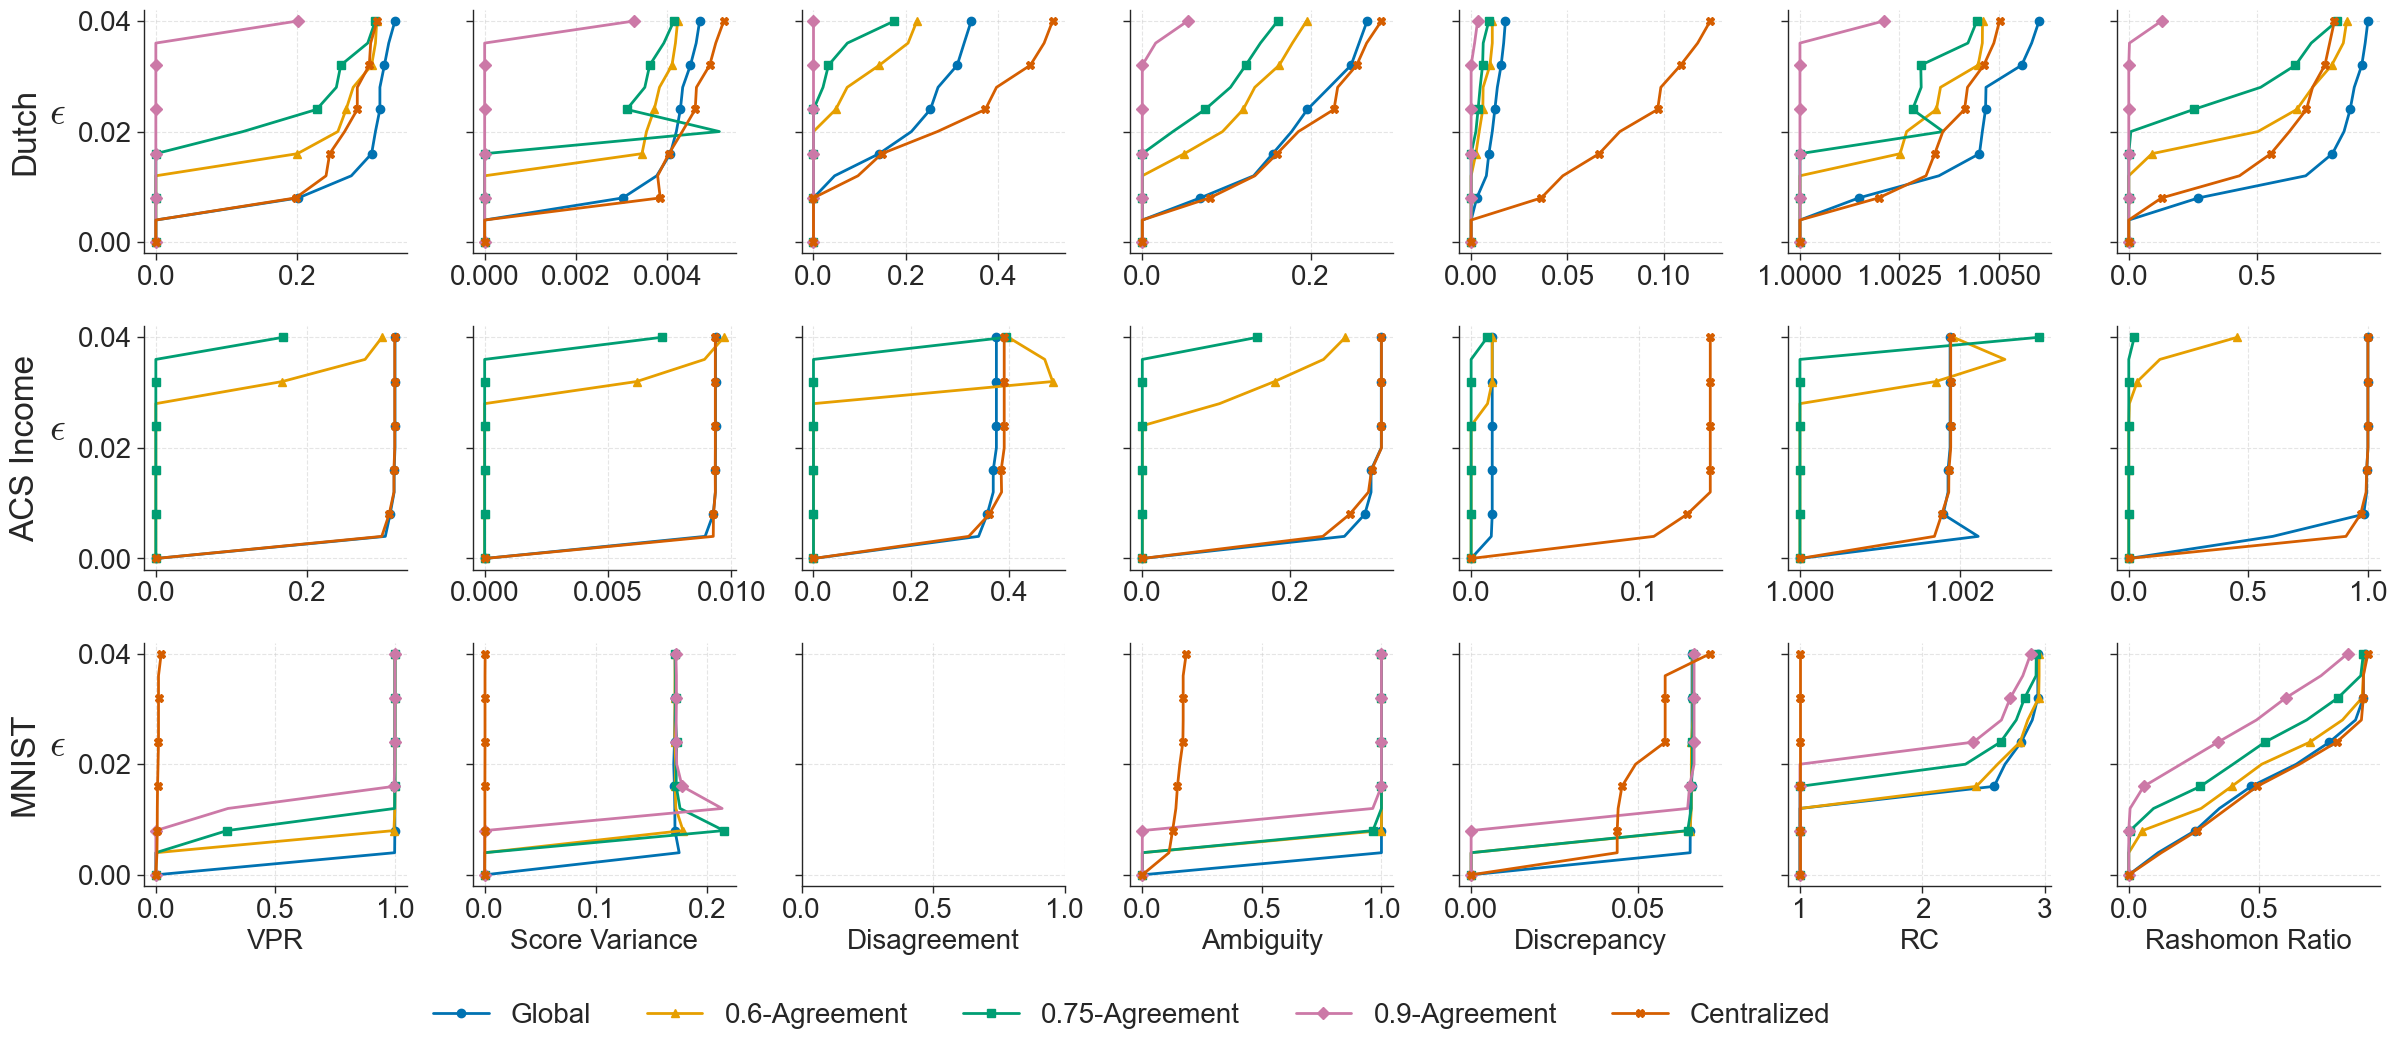

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- 1. CONFIGURATION ---
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")

params = {
    'text.usetex': False,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'axes.labelweight': 'normal',
    'font.weight': 'normal',
    'axes.titleweight': 'normal',
}
plt.rcParams.update(params)

# --- 2. MAPS ---
color_map = {
    "global": "#0072B2",      # Blue
    "0.6_global": "#E69F00",  # Orange 
    "0.75_global": "#009E73", # Bluish Green
    "0.9_global": "#CC79A7",  # Reddish Purple
    "centralized": "#D55E00"  # Vermilion
}

label_map = {
    "global": "Global",
    "0.6_global": "0.6-Agreement",
    "0.75_global": "0.75-Agreement",
    "0.9_global": "0.9-Agreement",
    "centralized": "Centralized"
}

marker_map = {
    "global": "o",
    "0.6_global": "^",
    "0.75_global": "s",
    "0.9_global": "D",
    "centralized": "X"
}

# --- 3. PLOTTING ---
# Note: sharey=True is fine for Epsilon, but X-axes are independent by default
fig, ax = plt.subplots(len(dataset_names), 7, figsize=(26, 12), sharey=True)

legend_handles = []
legend_labels = []

keys = ["global", "0.6_global", "0.75_global", "0.9_global", "centralized"]

for n, name in enumerate(dataset_names):
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]

    # --- A. Y-AXIS FORMATTING ---
    ax[n, 0].set_yticks([0.00, 0.02, 0.04])
    ax[n, 0].set_ylabel(r'$\epsilon$', fontsize=28, rotation=0, labelpad=15)

    # --- B. DATASET NAME ---
    ax[n, 0].text(-0.45, 0.5, name, 
                  transform=ax[n, 0].transAxes, 
                  rotation=90, 
                  ha='center', va='center', 
                  fontsize=24, fontweight='normal')

    for key in keys:
        if name == "ACS Income" and "0.9" in key:
            continue

        # --- C. DATA EXTRACTION ---
        vpr, score_var, disa_hat, amb, disc, rc, rashomon_ratio = [None]*7
        c = color_map.get(key, 'black')
        m = marker_map.get(key, 'o')

        if name == "ACS Income":
            vpr = runs_df[key]["vpr_50"][:11]
            score_var = runs_df[key]["score_var_90"][:11]
            disa_hat = runs_df[key]["disa_hat_90"][:11]
            amb = runs_df[key]["amb"][:11]
            disc = runs_df[key]["disc"][:11]
            if f"rc_{key}" in rc_runs_df.keys():
                rc = rc_runs_df[f"rc_{key}"][:11]
            rashomon_ratio = np.cumsum(runs_df[key]["rashomonratio"])/all_models[name]
        else:
            vpr = runs_df[key]["vpr_50"].array[0][:11]
            score_var = runs_df[key]["score_var_90"].array[0][:11]
            amb = runs_df[key]["amb"].array[0][:11]
            disc = runs_df[key]["disc"].array[0][:11]
            disa_hat = runs_df[key]["disa_hat_90"].array[0][:11]
            if f"rc_{key}" in rc_runs_df.keys():
                rc = rc_runs_df[f"rc_{key}"]["rc_50"].array[0][:11]
            rashomon_ratio = np.cumsum(runs_df[key]["rashomonratio"].array[0])/all_models[name]

        # --- D. PLOT LINES ---
        l, = ax[n, 0].plot(vpr, ensemble_size, color=c, marker=m, markevery=2, label=label_map[key])
        
        ax[n, 1].plot(score_var, ensemble_size, color=c, marker=m, markevery=2)
        
        if name != "MNIST":
            ax[n, 2].plot(disa_hat, ensemble_size, color=c, marker=m, markevery=2)
            
        ax[n, 3].plot(amb, ensemble_size, color=c, marker=m, markevery=2)
        ax[n, 4].plot(disc, ensemble_size, color=c, marker=m, markevery=2)

        if rc is not None:
             ax[n, 5].plot([2**e for e in rc], ensemble_size, color=c, marker=m, markevery=2)

        ax[n, 6].plot(rashomon_ratio, ensemble_size, color=c, marker=m, markevery=2)

        if n == 0 and key in label_map and label_map[key] not in legend_labels:
            legend_handles.append(l)
            legend_labels.append(label_map[key])

    # --- E. CLEANUP (UPDATED) ---
    titles = ['VPR', 'Score Variance', 'Disagreement', 'Ambiguity', 'Discrepancy', 'RC', 'Rashomon Ratio']
    
    for col in range(7):
        # Remove top and right borders
        ax[n, col].spines['top'].set_visible(False)
        ax[n, col].spines['right'].set_visible(False)
        
        # CHANGED: We now show labels (titles) only on the bottom,
        # BUT we removed the line that was hiding the x-ticks on other rows.
        if n == len(dataset_names) - 1:
            ax[n, col].set_xlabel(titles[col], fontweight='normal')
        
        # Previously, there was an 'else: set_xticklabels([])' here. 
        # Removing it ensures numbers appear on all rows.

# --- F. LAYOUT & LEGEND ---
# Increased hspace from 0.1 to 0.35 to prevent X-ticks from overlapping the row below
plt.subplots_adjust(left=0.12, right=0.98, bottom=0.15, wspace=0.25, hspace=0.30)

fig.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    ncol=5,
    bbox_to_anchor=(0.5, 0.01),
    frameon=False,
    fontsize=20
)

plt.savefig("global.pdf", dpi=500, bbox_inches='tight')
plt.show()

### Individual Rashomon Set Analysis

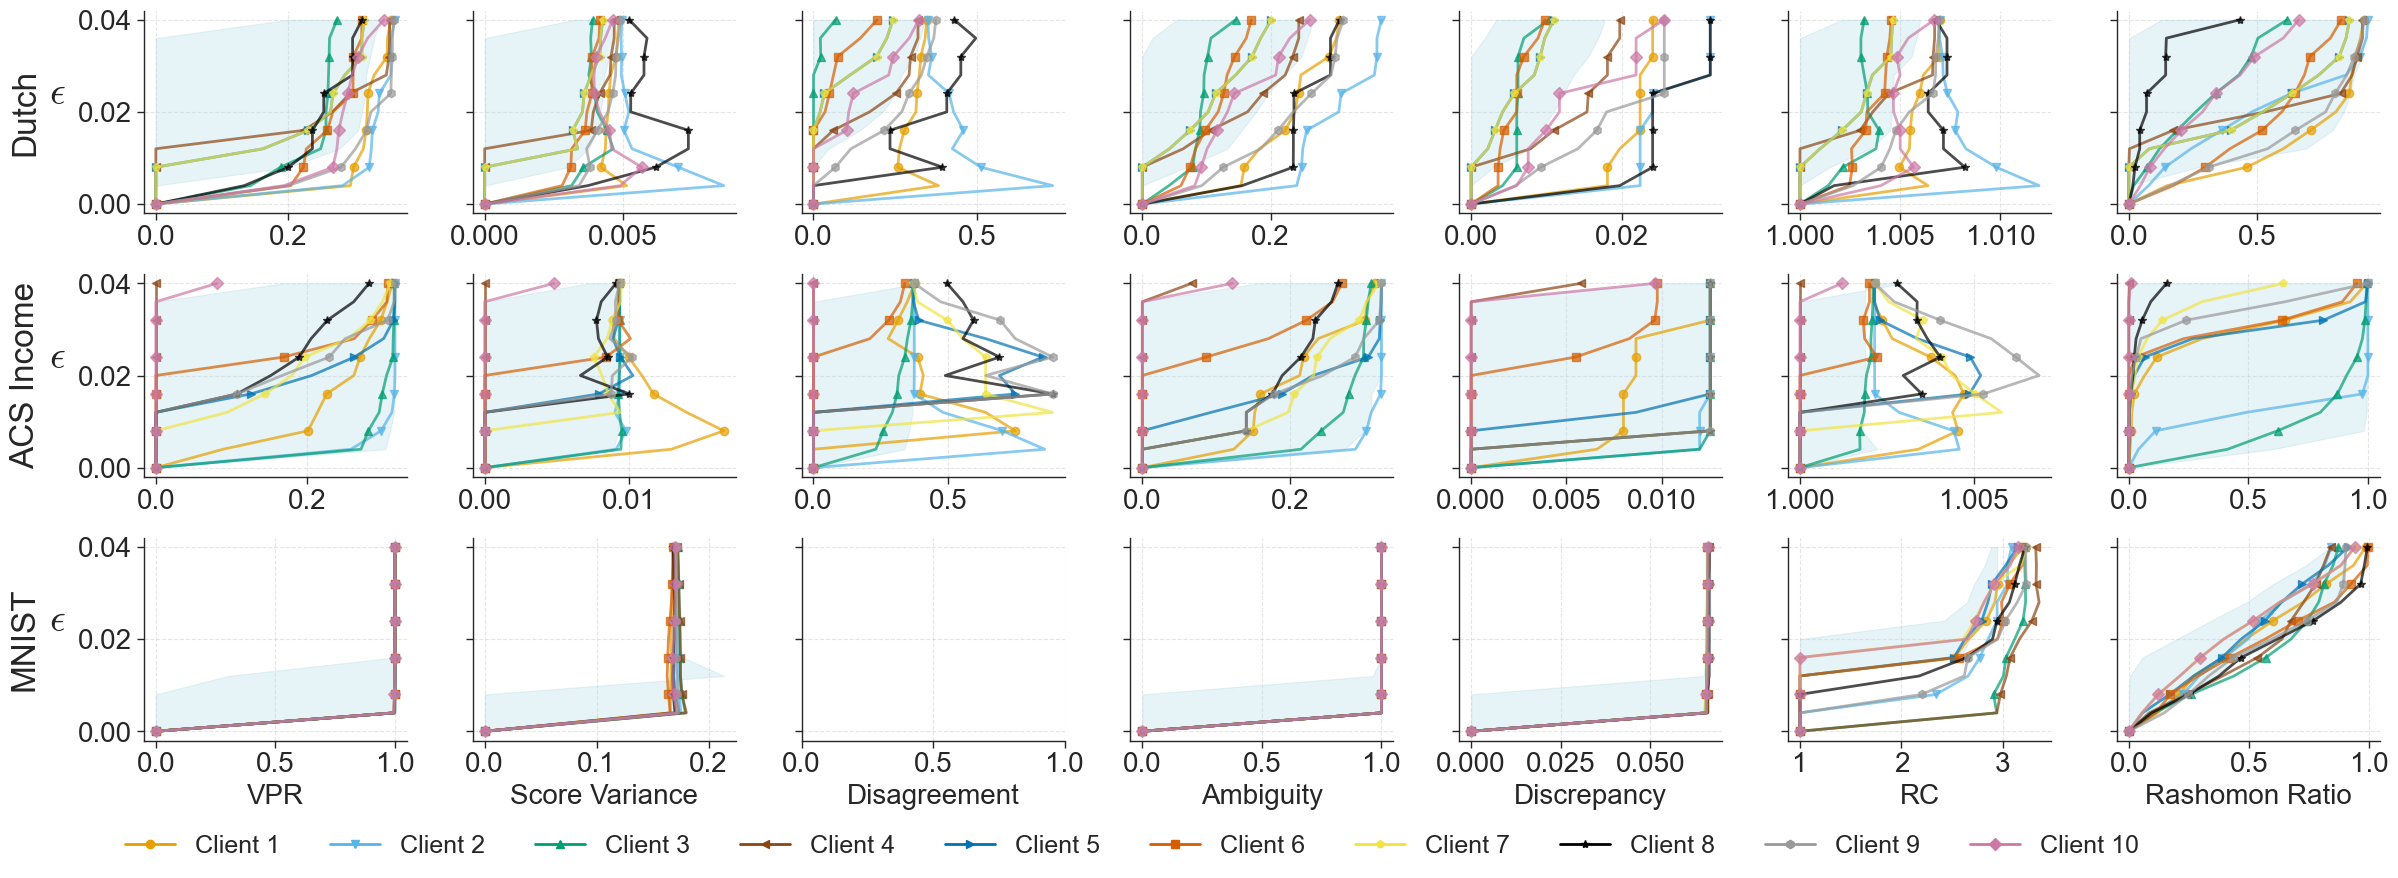

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- 1. CONFIGURATION ---
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")

params = {
    'text.usetex': False,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
}
plt.rcParams.update(params)

# --- 2. PALETTE & MAPS ---
colors = [
    "#E69F00", # 1. Orange
    "#56B4E9", # 2. Sky Blue
    "#009E73", # 3. Bluish Green
    "#8B4513", # 10. Saddle Brown
    "#0072B2", # 5. Blue
    "#D55E00", # 6. Vermilion
    "#F0E442", # 4. Yellow
    "#000000", # 8. Black
    "#999999", # 9. Grey 
    "#CC79A7", # 7. Reddish Purple
]

markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'D']

keys = [ "individual_0", "individual_1", "individual_2", "individual_3", "individual_4", 
         "individual_5", "individual_6", "individual_7", "individual_8", "individual_9"]
labels = [ "Client 1", "Client 2", "Client 3", "Client 4", "Client 5", 
           "Client 6", "Client 7", "Client 8", "Client 9", "Client 10"]

color_map = {k: colors[i] for i, k in enumerate(keys)}
marker_map = {k: markers[i] for i, k in enumerate(keys)}

# --- 3. ROBUST DATA EXTRACTOR ---
def get_data_array(source, key, length_check=11):
    """
    Robustly extracts an array, handling attributes, nested lists, and missing keys.
    """
    try:
        # Check if key exists (if source is dict/df)
        if isinstance(source, (dict, type(runs_df))) and key not in source:
             raise KeyError(f"Key '{key}' not found")

        raw = source[key]
        
        # Handle Pandas Series with .array attribute
        if hasattr(raw, 'array'):
            raw = raw.array[0]
            
        arr = np.array(raw)
        
        # Case A: Flat and correct length
        if arr.ndim == 1 and len(arr) >= length_check:
            return arr[:length_check]
            
        # Case B: Nested (1, N)
        if arr.ndim == 2 and arr.shape[0] == 1:
            return arr[0][:length_check]
            
        # Case C: Object array wrapping list
        if arr.size == 1 and isinstance(arr.item(), (list, np.ndarray)):
            return np.array(arr.item())[:length_check]

        return arr
        
    except Exception:
        return np.zeros(length_check)

# --- 4. PLOTTING ---
fig, ax = plt.subplots(len(dataset_names), 7, figsize=(26, 10), sharey=True)

legend_handles = []
legend_labels = []
line_alpha = 0.7 

for n, name in enumerate(dataset_names):
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]

    # --- A. Y-AXIS FORMATTING ---
    ax[n, 0].set_yticks([0.00, 0.02, 0.04])
    ax[n, 0].set_ylabel(r'$\epsilon$', fontsize=28, rotation=0, labelpad=15)

    # --- B. DATASET NAME ---
    ax[n, 0].text(-0.45, 0.5, name, 
                  transform=ax[n, 0].transAxes, 
                  rotation=90, 
                  ha='center', va='center', 
                  fontsize=24, fontweight='normal')

    # --- C. LOOP CLIENTS ---
    for k in range(len(keys)):
        key = keys[k]
        c = color_map[key]
        m = marker_map[key]
        
        # --- ROBUST DATA EXTRACTION ---
        # We access runs_df[key] first, then extract metrics from that container
        client_data = runs_df[key]
        
        vpr = get_data_array(client_data, "vpr_50")
        score_var = get_data_array(client_data, "score_var_90")
        disa_hat = get_data_array(client_data, "disa_hat_90")
        amb = get_data_array(client_data, "amb")
        disc = get_data_array(client_data, "disc")
        
        # Rashomon Ratio
        raw_rashomon = get_data_array(client_data, "rashomonratio")
        if np.all(raw_rashomon == 0):
            raw_rashomon = get_data_array(client_data, "rashomon_ratio")
        rashomon_ratio = np.cumsum(raw_rashomon)/all_models[name]

        # RC Extraction (Handling strict key logic)
        rc = None
        rc_key = f"rc_{key[-1]}_individual"
        
        if rc_key in rc_runs_df.keys():
            raw_rc_container = rc_runs_df[rc_key]
            # If it's a dict (Dutch/MNIST), drill down to "rc_50". 
            # If it's a list (ACS), use directly.
            if isinstance(raw_rc_container, (list, np.ndarray)):
                 rc = get_data_array({ "k": raw_rc_container }, "k")
            else:
                 rc = get_data_array(raw_rc_container, "rc_50")

        # --- PLOT LINES ---
        l, = ax[n, 0].plot(vpr, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha, label=labels[k])
        ax[n, 1].plot(score_var, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        
        if name != "MNIST":
            ax[n, 2].plot(disa_hat, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        
        ax[n, 3].plot(amb, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        ax[n, 4].plot(disc, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        
        if rc is not None:
            ax[n, 5].plot([2**e for e in rc], ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
            
        ax[n, 6].plot(rashomon_ratio, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)

        if n == 0:
             legend_handles.append(l)
             legend_labels.append(labels[k])

    # --- D. FILL BETWEEN (SHADOW) ---
    # Define baseline keys
    global_key = "global"
    comp_key = "0.75_global" if name == "ACS Income" else "0.9_global"
    
    # Extract Global Baselines using helper
    g_data = runs_df[global_key]
    c_data = runs_df[comp_key]
    
    vpr_g = get_data_array(g_data, "vpr_50")
    score_var_g = get_data_array(g_data, "score_var_90")
    disa_hat_g = get_data_array(g_data, "disa_hat_90")
    amb_g = get_data_array(g_data, "amb")
    disc_g = get_data_array(g_data, "disc")
    
    raw_rr_g = get_data_array(g_data, "rashomonratio") 
    if np.all(raw_rr_g == 0): raw_rr_g = get_data_array(g_data, "rashomon_ratio")
    rr_g = np.cumsum(raw_rr_g)/all_models[name]

    # Extract Comparison Baselines (0.75 or 0.9)
    vpr_c = get_data_array(c_data, "vpr_50")
    score_var_c = get_data_array(c_data, "score_var_90")
    disa_hat_c = get_data_array(c_data, "disa_hat_90")
    amb_c = get_data_array(c_data, "amb")
    disc_c = get_data_array(c_data, "disc")
    
    raw_rr_c = get_data_array(c_data, "rashomonratio")
    if np.all(raw_rr_c == 0): raw_rr_c = get_data_array(c_data, "rashomon_ratio")
    rr_c = np.cumsum(raw_rr_c)/all_models[name]
    
    # Extract RC Baselines
    rc_g_key = "rc_global"
    rc_c_key = f"rc_{comp_key}"
    
    # Helper for RC extraction
    def extract_rc(key_name):
        if key_name in rc_runs_df:
            raw = rc_runs_df[key_name]
            if isinstance(raw, (list, np.ndarray)):
                return get_data_array({"k": raw}, "k")
            return get_data_array(raw, "rc_50")
        return np.zeros(11)

    rc_g = extract_rc(rc_g_key)
    rc_c = extract_rc(rc_c_key)

    # Plot Fill
    fill_color = "#ADD8E6" 
    fill_alpha = 0.3
    
    ax[n,0].fill_betweenx(ensemble_size, vpr_c, vpr_g, color=fill_color, alpha=fill_alpha)
    ax[n,1].fill_betweenx(ensemble_size, score_var_c, score_var_g, color=fill_color, alpha=fill_alpha)
    if name!="MNIST":
        ax[n,2].fill_betweenx(ensemble_size, disa_hat_c, disa_hat_g, color=fill_color, alpha=fill_alpha)
    ax[n,3].fill_betweenx(ensemble_size, amb_c, amb_g, color=fill_color, alpha=fill_alpha)
    ax[n,4].fill_betweenx(ensemble_size, disc_c, disc_g, color=fill_color, alpha=fill_alpha)
    ax[n,5].fill_betweenx(ensemble_size, [2**e for e in rc_c], [2**e for e in rc_g], color=fill_color, alpha=fill_alpha)
    ax[n,6].fill_betweenx(ensemble_size, rr_c, rr_g, color=fill_color, alpha=fill_alpha)

    # --- E. CLEANUP ---
    titles = ['VPR', 'Score Variance', 'Disagreement', 'Ambiguity', 'Discrepancy', 'RC', 'Rashomon Ratio']
    for col in range(7):
        ax[n, col].spines['top'].set_visible(False)
        ax[n, col].spines['right'].set_visible(False)
        
        if n == len(dataset_names) - 1:
            ax[n, col].set_xlabel(titles[col], fontweight='normal')
        # else:
        #     ax[n, col].set_xticklabels([])

# --- F. LAYOUT & LEGEND ---
plt.subplots_adjust(left=0.12, right=0.98, bottom=0.15, wspace=0.25, hspace=0.30)

leg = fig.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    ncol=10, 
    bbox_to_anchor=(0.5, 0.01),
    frameon=False,
    fontsize=18
)

for line in leg.get_lines():
    line.set_alpha(1.0)

plt.savefig("individuals.pdf", dpi=500, bbox_inches='tight')
plt.show()

#### Demographic Parity

This plots for 5 clients 10 models of the 0.004 Rashomon set with their accuracy and demographic parity metrics. The best demographic parity/accuracy model is highlighted in each plot.

In [6]:
api_list = [] #your list here
dataset_names = ["Dutch", "ACS Income"]
#modify if necessary
all_models = [["2_0.5_1042743846", "5_0.75_837111583", "3_1.0_3208832207", "6_0.75_2717405230", "9_1.0_2663209071", "5_1.0_413915310", "1_1.0_2022228815", "9_1.0_2967503466", "9_1.0_2920428389", "6_0.75_3189354903", "6_1.0_729456879","1_1.0_2842180840", "2_1.0_3040396874", "8_1.0_2891293821", "8_1.0_4069525546"],
          ["5_1.0_7", "8_0.5_0", "6_0.25_4", "3_1.0_3", "2_1.0_8", "4_0.75_1", "6_0.25_3", "3_0.25_4", "6_1.0_1", "9_0.25_1", "7_0.5_4","4_1.0_6", "1_1.0_4", "5_1.0_9", "2_0.75_1"]]
clients = [2945194472877206461, 1885446857198079865 , 3971837850219807024, 7738774760351418614, 7795859673851708282]
all_runs = {}
all_rc_runs = {}
for a in range(len(api_list)):
# Project is specified by <entity/project-name>
    run = api.run(api_list[a])
    runs_df = {}
    models = all_models[a]
    for client in clients:
        m = [f"Rashomon Set Test Node {client} - Model {model}_acc" for model in models]
        d = [f"Rashomon Set Test Node {client} - Model {model}_dp_local" for model in models]
        df = pd.DataFrame()
        accuracy= []
        dp = []
        for i in range(len(m)):
            accuracy.append(run.summary[m[i]])
            dp.append(run.summary[d[i]])
        df["accuracy"] = accuracy
        df["demographic_parity"] = dp




        #print(df)


        runs_df[client] = df
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files

    m = [f"{model}_accuracy" for model in models]
    d = [f"{model}_demographic_parity" for model in models]
    df = pd.DataFrame()
    accuracy= []
    dp = []
    for i in range(len(m)):
        accuracy.append(run.summary[m[i]])
        dp.append(run.summary[d[i]])
    df["accuracy"] = accuracy
    df["demographic_parity"] = dp
    runs_df["Global"] = df

    all_runs[dataset_names[a]] = runs_df

#print(all_runs)



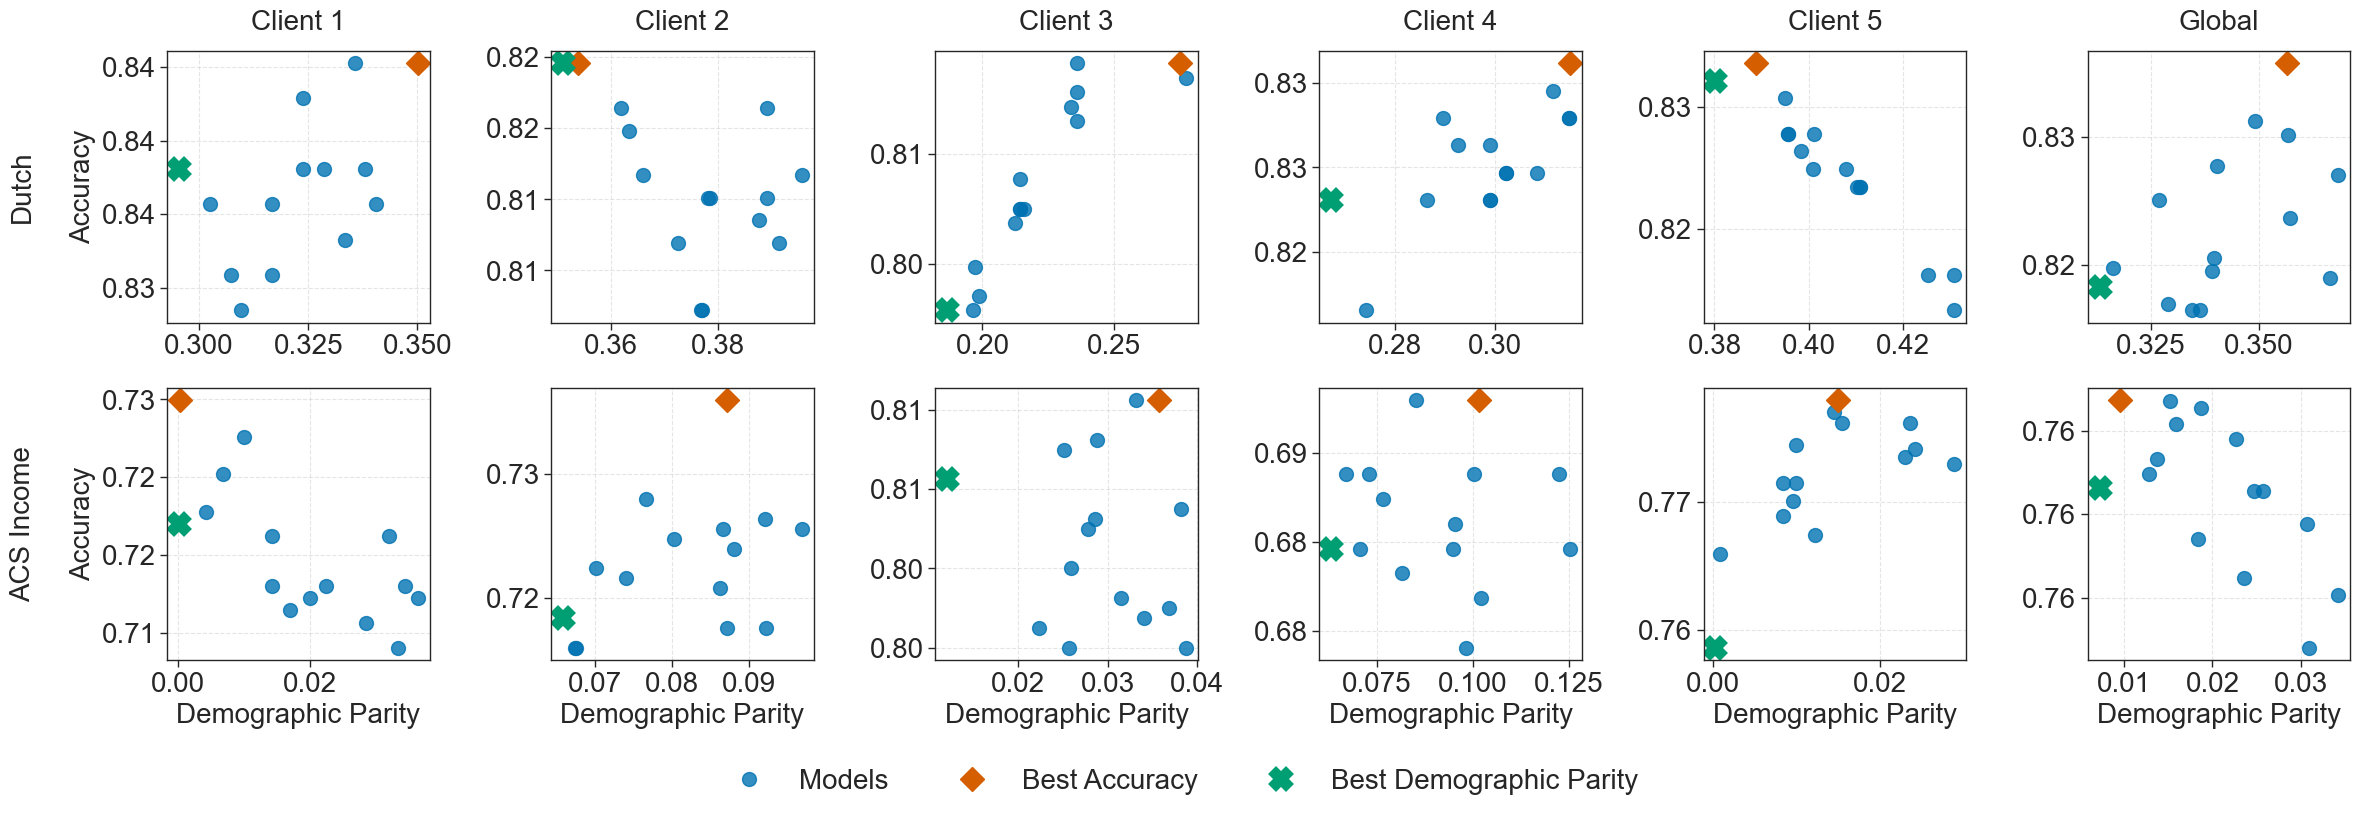

In [7]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker # Imported for formatting
import numpy as np

# --- 1. CONFIGURATION ---
params = {
    'font.size': 20,
    'axes.labelsize': 20,
    'axes.titlesize': 20,
    'xtick.labelsize': 20,
    'ytick.labelsize': 20,
    'legend.fontsize': 20,
    'lines.markersize': 10,
    'figure.titlesize': 22
}
plt.rcParams.update(params)

# --- 2. COLOR BLIND PALETTE ---
color_models = "#0072B2"    # Blue (Okabe-Ito)
color_best_acc = "#D55E00"  # Vermilion
color_best_dp = "#009E73"   # Bluish Green

# --- 3. PLOTTING ---
if "Global" not in clients:
    clients = clients + ["Global"]

titles = ["Client 1", "Client 2", "Client 3", "Client 4", "Client 5", "Global"]

fig, ax = plt.subplots(len(dataset_names), 6, figsize=(24, 8))

legend_elements = []

for n in range(len(dataset_names)):
    name = dataset_names[n]
    runs_df = all_runs[name]

    for k in range(len(titles)):
        if k >= len(clients): break
        
        key = clients[k]
        
        try:
            accuracy = np.array(runs_df[key]["accuracy"])
            dp = np.array(runs_df[key]["demographic_parity"])
        except KeyError:
            continue

        # --- Plotting ---
        l1, = ax[n, k].plot(dp, accuracy, "o", color=color_models, alpha=0.8, label="Models")
        
        best_idx = np.argmax(accuracy)
        l2, = ax[n, k].plot(dp[best_idx], accuracy[best_idx], "D", 
                            color=color_best_acc, markersize=12, label="Best Acc.")

        best_dp_idx = np.argmin(np.abs(dp))
        l3, = ax[n, k].plot(dp[best_dp_idx], accuracy[best_dp_idx], "X", 
                            color=color_best_dp, markersize=14, markeredgewidth=3, label="Best DP")

        if n == 0 and k == 0:
            legend_elements = [l1, l2, l3]

        # --- Y-AXIS FORMATTING (2 Decimal Places) ---
        # This forces the ticks to look like '0.80', '0.82', etc.
        ax[n, k].yaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

        # --- Labels & Titles ---
        if k == 0:
            ax[n, k].set_ylabel(f'{name}\n\nAccuracy', fontweight='normal')

        if n == 0:
            ax[n, k].set_title(titles[k], fontweight='normal', pad=15)
            
        if n == len(dataset_names) - 1:
            ax[n, k].set_xlabel('Demographic Parity')

# --- 4. LEGEND & SAVING ---
fig.legend(handles=legend_elements, 
           labels=["Models", "Best Accuracy", "Best Demographic Parity"], 
           loc='lower center', 
           ncol=3, 
           bbox_to_anchor=(0.5, -0.05),
           frameon=False) 

plt.tight_layout()
plt.subplots_adjust(bottom=0.15)

plt.savefig("demographic_parity.pdf", dpi=1200, bbox_inches='tight')
plt.show()

### Plots for Cumulative Distribution

In [8]:
api_list = [] #your list here
dataset_names = ["Dutch", "ACS Income", "MNIST"]
all_models = {"Dutch": 375, "ACS Income":392, "MNIST":400}
all_runs = {}
all_rc_runs = {}
keys = ["global", "0.6_global", "0.75_global", "0.9_global", "rc_global", "rc_0.6_global", "rc_0.75_global", "rc_0.9_global"]

for a in range(len(api_list)):
# Project is specified by <entity/project-name>
    runs = api.runs(api_list[a])

    runs_df = {}
    rc_runs_df = {}

    for run in runs:

        if run.name in keys and run.created_at >= "2025-11-28T09:54:16.669007Z":


        # .name is the human-readable name of the run.

            if "rc_" in run.name:

                if dataset_names[a] == "ACS Income" and not "0.9" in run.name:
                    #run.file("wandb-summary.json").download(replace=True, root =f"income_results/{run.name}" )
                    summary = json.load(open(f"income_results/{run.name}/wandb-summary.json"))
                    rc_runs_df[run.name] = summary["rc"]
                    print(f"Loaded {dataset_names[a], run.name} successfully")
                elif dataset_names[a]!="ACS Income":
                    df = run.history(keys = ["rc"] )
                    rc_runs_df[run.name] = df
                    print(f"Loaded {dataset_names[a], run.name} successfully")

            else:

                if dataset_names[a] == "ACS Income" and not "0.9" in run.name:
                    #history = run.scan_history()
                    #print(run.summary())
                    df = {}
                    #run.file("wandb-summary.json").download(replace=True, root =f"income_results/{run.name}" )
                    summary = json.load(open(f"income_results/{run.name}/wandb-summary.json"))
                    df["vpr"] = summary["vpr"]
                    df["score_var"] = summary["score_var"]
                    df["disa_hat"] = summary["disa_hat"]

                    runs_df[run.name] = df

                    print(f"Loaded {dataset_names[a], run.name} successfully")

                elif dataset_names[a]!="ACS Income":
                    df = run.history(keys = [ "disa_hat", "score_var", "vpr"])
                    #print(df)

                    runs_df[run.name] = df
                    print(f"Loaded {dataset_names[a], run.name} successfully")
            # .summary contains the output keys/values for metrics like accuracy.
            #  We call ._json_dict to omit large files




        else:
            continue
    all_runs[dataset_names[a]] = runs_df
    all_rc_runs[dataset_names[a]] = rc_runs_df

        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files


    #print(all_rc_runs, all_runs)

Loaded ('Dutch', '0.6_global') successfully
Loaded ('Dutch', 'rc_0.6_global') successfully
Loaded ('Dutch', '0.75_global') successfully
Loaded ('Dutch', 'rc_0.75_global') successfully
Loaded ('Dutch', '0.9_global') successfully
Loaded ('Dutch', 'rc_0.9_global') successfully
Loaded ('Dutch', 'global') successfully
Loaded ('Dutch', 'rc_global') successfully
Loaded ('ACS Income', '0.6_global') successfully
Loaded ('ACS Income', 'rc_0.6_global') successfully
Loaded ('ACS Income', '0.75_global') successfully
Loaded ('ACS Income', 'rc_0.75_global') successfully
Loaded ('ACS Income', 'global') successfully
Loaded ('ACS Income', 'global') successfully
Loaded ('ACS Income', 'global') successfully
Loaded ('ACS Income', 'rc_global') successfully
Loaded ('MNIST', 'global') successfully
Loaded ('MNIST', 'rc_global') successfully
Loaded ('MNIST', '0.6_global') successfully
Loaded ('MNIST', 'rc_0.6_global') successfully
Loaded ('MNIST', '0.75_global') successfully
Loaded ('MNIST', 'rc_0.75_global') s

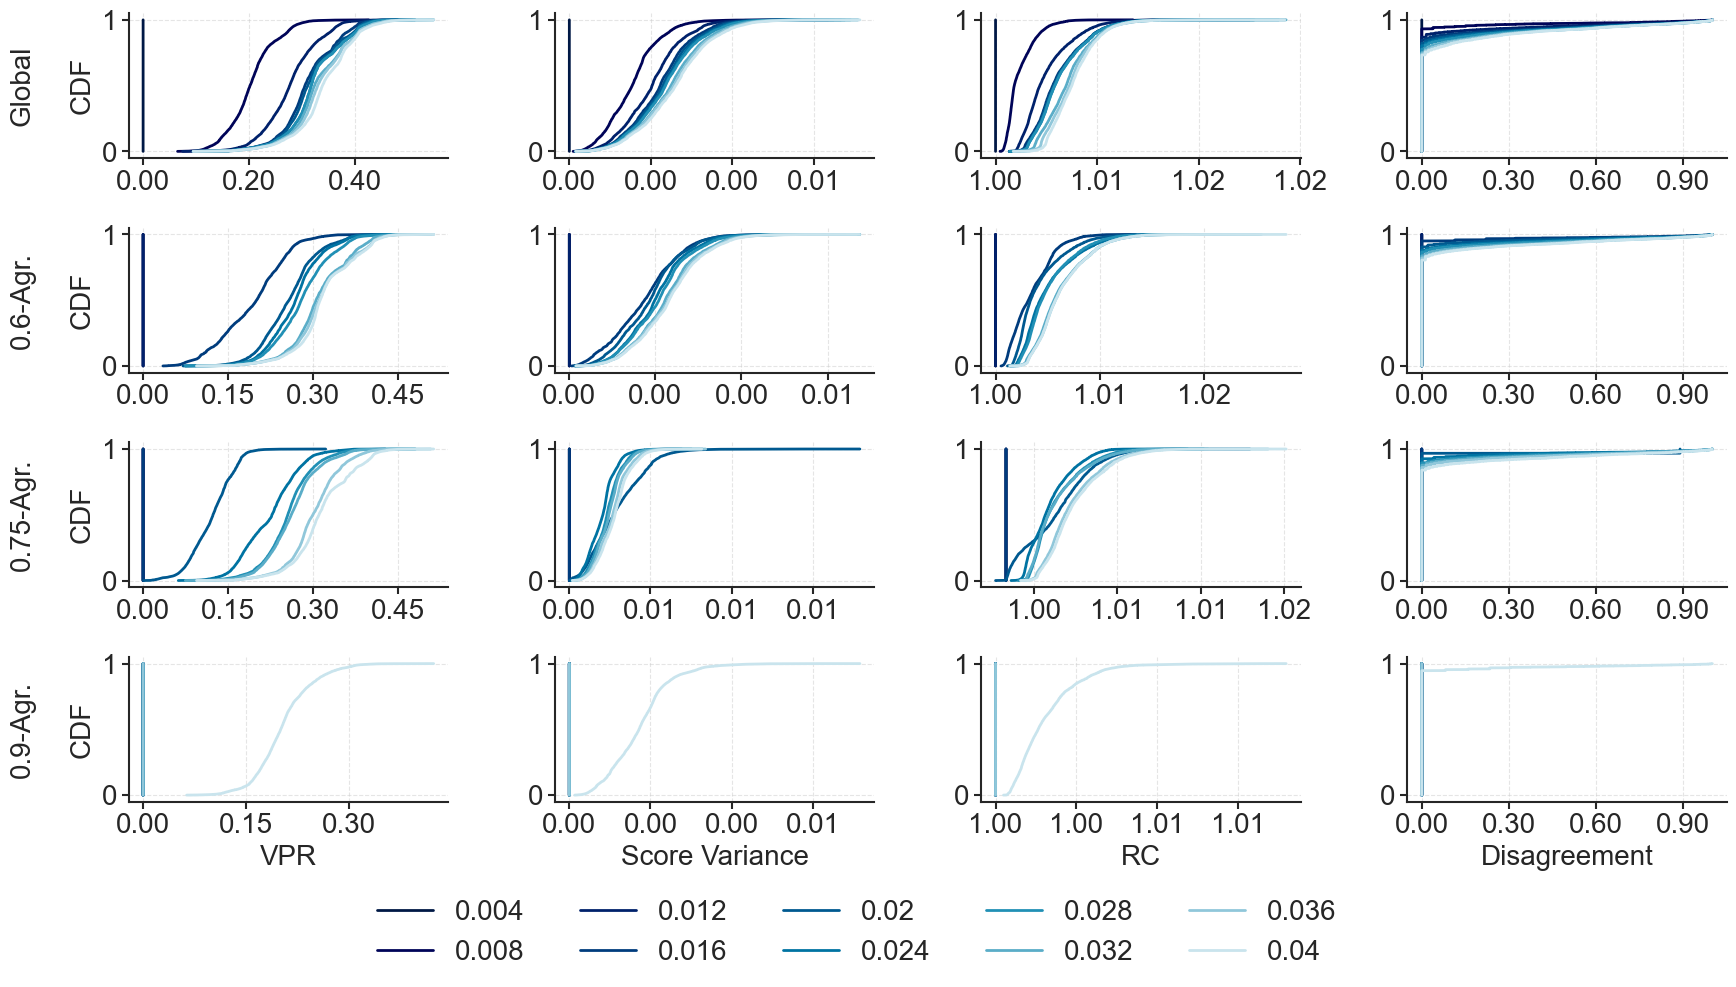

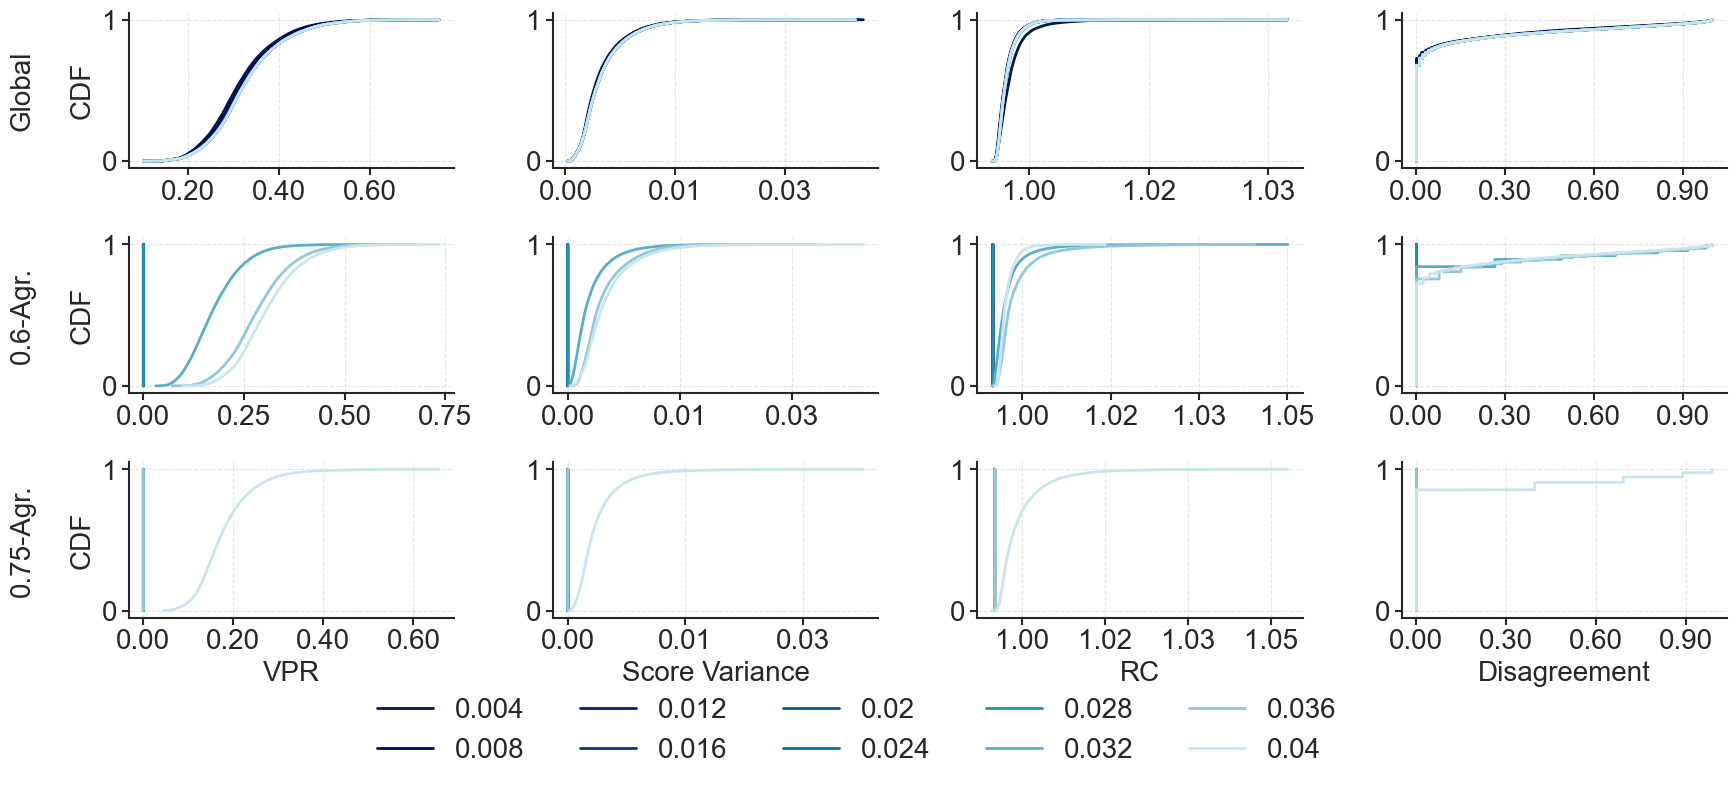

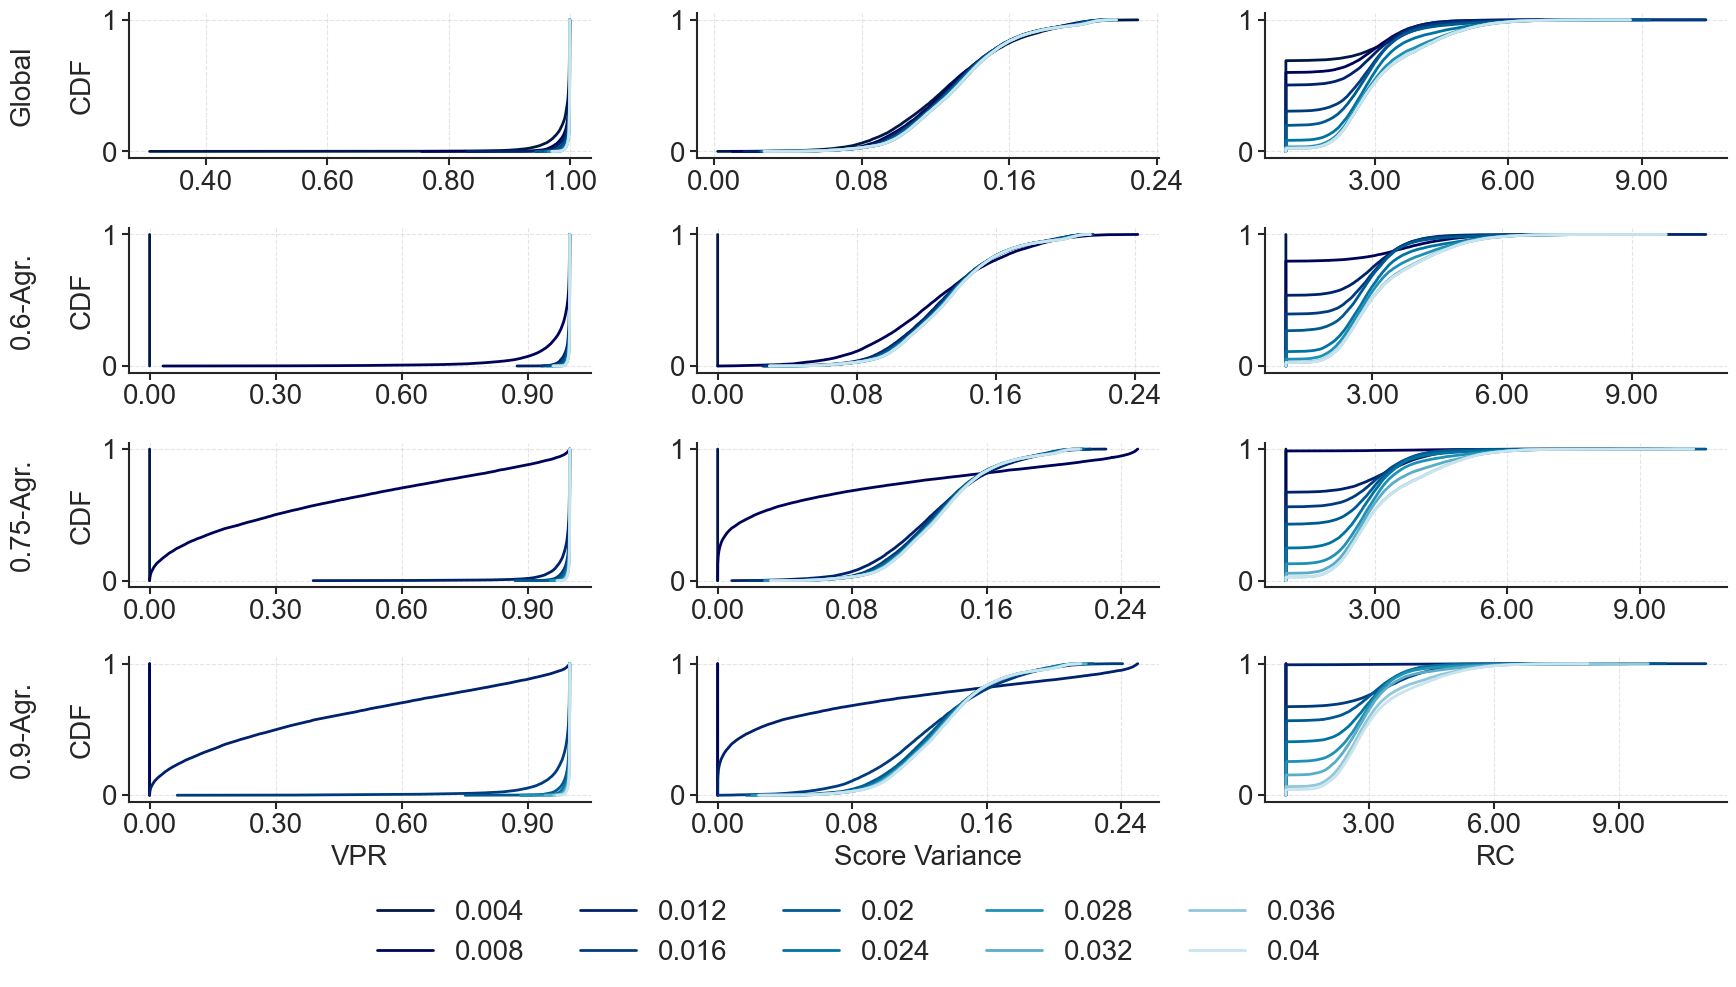

In [9]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import numpy as np

# 1) Set global font size to 20
plt.rcParams.update({
    'font.size': 20,
    'axes.linewidth': 1.5, # Slightly thicker axis lines to match the font
    'xtick.major.width': 1.5,
    'ytick.major.width': 1.5
})

ensemble_size = [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036, 0.04]
labels = ["Global", "0.6-Agr.", "0.75-Agr.", "0.9-Agr.", "Centralized"]

for n in range(len(dataset_names)):
    name = dataset_names[n]
    f = 4
    if name == "ACS Income":
        m = 3
        size = (18, 8)
    else:
        m = 4
        size = (18, 10)
        if name == "MNIST":
            f = 3
            
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]

    # Colors: Start at 0.2 to ensure visibility against white background
    colors = cm.ocean(np.linspace(0.2, 1, len(ensemble_size)+1))
    
    fig, ax = plt.subplots(m, f, figsize=size)

    for k in range(m):
        key = keys[k]
        if name == "ACS Income":
            l = len(runs_df["global"]["vpr"][0])
            cum = np.arange(1, l+1)/l
            vpr = runs_df[key]["vpr"]
            score_var = runs_df[key]["score_var"]
            disa_hat = runs_df[key]["disa_hat"]
        else:
            l = len(runs_df["global"]["vpr"].array[0][0])
            cum = np.arange(1, l+1)/l
            vpr = runs_df[key]["vpr"].array[0]
            score_var = runs_df[key]["score_var"].array[0]
            disa_hat = runs_df[key]["disa_hat"].array[0]


        for i in range(1, len(ensemble_size)):
            # Linewidth: 2.5 is a sweet spot for "bold but precise" in papers
            lw = 2
            
            if name == "ACS Income":
                rc = rc_runs_df[f"rc_{key}"]
                ax[k, 2].plot(np.sort([2**r for r in rc[i]]), cum, color=colors[i], linewidth=lw)
            else:
                rc = rc_runs_df[f"rc_{key}"]["rc"].array[0]
                ax[k, 2].plot(np.sort([2**r for r in rc[i]]), cum, color=colors[i], linewidth=lw)

            ax[k, 0].plot(np.sort(vpr[i]), cum, label=key, color=colors[i], linewidth=lw)
            ax[k, 1].plot(np.sort(score_var[i]), cum, color=colors[i], linewidth=lw)
            
            if name != "MNIST":
                ax[k, 3].plot(np.sort(disa_hat[i]), cum, color=colors[i], linewidth=lw)


        ax[k, 0].set_ylabel(f'{labels[k]}\n\nCDF')

        # --- AXIS CLEANUP LOOP ---
        for col in range(f):
            curr_ax = ax[k, col]
            
            # 1. Despine: Remove Top and Right borders
            curr_ax.spines['top'].set_visible(False)
            curr_ax.spines['right'].set_visible(False)
            
            # 2. Fix ticks: Restrict number of bins to avoid overlap
            curr_ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=4)) 
            
            # 3. Format decimals: 2 decimal places
            curr_ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.2f'))

        if k == m-1:
            ax[k, 0].set_xlabel('VPR')
            ax[k, 1].set_xlabel('Score Variance')
            if name != "MNIST":
                ax[k, 3].set_xlabel('Disagreement')
            ax[k, 2].set_xlabel('RC')

    # Legend configuration
    fig.legend(labels=ensemble_size[1:], 
               loc='lower center', 
               ncol=5, # 10 columns fits well on width 18; change to 5 if it feels crowded
               bbox_to_anchor=(0.5, -0.01), 
               frameon=False)

    # Layout adjustment
    plt.tight_layout(rect=[0, 0.08, 1, 1]) 
    
    # Save command
    plt.savefig(f"CDF_{name}.pdf", dpi=300, bbox_inches='tight')
    plt.show()

In [10]:
api_list = [] #your list here
dataset_names = ["Dutch_10", "Dutch_20", "Dutch_30", "Dutch_40", "Dutch_50"]
all_models = {"Dutch_10":396, "Dutch_20":375, "Dutch_30":285, "Dutch_40":535, "Dutch_50":400}
all_runs = {}
all_rc_runs = {}
keys = ["global", "0.6_global", "0.75_global", "0.9_global", "rc_global", "rc_0.6_global", "rc_0.75_global", "rc_0.9_global"]

for a in range(len(api_list)):
    #print(api_list)
# Project is specified by <entity/project-name>
    runs = api.runs(api_list[a])

    runs_df = {}
    rc_runs_df = {}

    for run in runs:
        if dataset_names[a] == "Dutch_50":
                    run.file("wandb-summary.json").download(replace=True, root =f"dutch_results/{run.name}" )
                    summary = json.load(open(f"dutch_results/{run.name}/wandb-summary.json"))
                    df["rashomonratio"] = summary["rashomonratio"]
                    df["vpr_50"] = summary["vpr_50"]
                    df["score_var_90"] = summary["score_var_90"]
                    df["disa_hat_90"] = summary["disa_hat_90"]
                    df["amb"] = summary["amb"]
                    df["disc"] = summary["disc"]
                    runs_df[run.name] = df

                    print(f"Loaded {dataset_names[a], run.name} successfully")


        if run.name in keys and run.created_at >= "2025-11-28T09:54:16.669007Z":
            if (dataset_names[a] in ["Dutch_50", "Dutch_10", "Dutch_40" ] and "0.9" in run.name) or (dataset_names[a] in [ "Dutch_10" ] and "0.75" in run.name):
                print(f" did not Load {dataset_names[a], run.name} ")
                continue

            elif "rc_" in run.name:
                df = run.history(keys = ["rc_50"] )
                rc_runs_df[run.name] = df
                print(f"Loaded {dataset_names[a], run.name} successfully")

            else:


                    df = run.history(keys = ["amb", "disc", "disa_hat_90", "score_var_90", "vpr_50"])
                    df["rashomonratio"] = run.history(keys = ["rashomonratio"])["rashomonratio"]
                    runs_df[run.name] = df
                    print(f"Loaded {dataset_names[a], run.name} successfully")
        # .summary contains the output keys/values for metrics like accuracy.
        #  We call ._json_dict to omit large files

    all_runs[dataset_names[a]] = runs_df
    all_rc_runs[dataset_names[a]] = rc_runs_df
runs_df = {}
rc_runs_df = {}

for k in ["global", "0.6_global", "0.75_global", "rc_global", "rc_0.6_global", "rc_0.75_global"]:
    #run.file("wandb-summary.json").download(replace=True, root =f"dutch_results/{run.name}" )
    summary = json.load(open(f"dutch_results/{k}/wandb-summary.json"))
    if "rc_" in k:
        #df = run.history(keys = ["rc_50"] )
        rc_runs_df[k] = summary["rc_50"]
    else:
        df = {}
        df["rashomonratio"] = summary["rashomonratio"]
        df["vpr_50"] = summary["vpr_50"]
        df["score_var_90"] = summary["score_var_90"]
        df["disa_hat_90"] = summary["disa_hat_90"]
        df["amb"] = summary["amb"]
        df["disc"] = summary["disc"]
        runs_df[k] = df
all_runs[dataset_names[-1]] = runs_df
all_rc_runs[dataset_names[-1]] = rc_runs_df

#print(all_runs)




Loaded ('Dutch_10', 'global') successfully
Loaded ('Dutch_10', 'rc_global') successfully
Loaded ('Dutch_10', '0.6_global') successfully
Loaded ('Dutch_10', 'rc_0.6_global') successfully
 did not Load ('Dutch_10', '0.75_global') 
 did not Load ('Dutch_10', 'rc_0.75_global') 
 did not Load ('Dutch_10', '0.9_global') 
 did not Load ('Dutch_10', 'rc_0.9_global') 
Loaded ('Dutch_20', '0.6_global') successfully
Loaded ('Dutch_20', 'rc_0.6_global') successfully
Loaded ('Dutch_20', '0.75_global') successfully
Loaded ('Dutch_20', 'rc_0.75_global') successfully
Loaded ('Dutch_20', '0.9_global') successfully
Loaded ('Dutch_20', 'rc_0.9_global') successfully
Loaded ('Dutch_20', 'global') successfully
Loaded ('Dutch_20', 'rc_global') successfully
Loaded ('Dutch_30', 'global') successfully
Loaded ('Dutch_30', 'rc_global') successfully
Loaded ('Dutch_30', '0.6_global') successfully
Loaded ('Dutch_30', 'rc_0.6_global') successfully
Loaded ('Dutch_30', '0.75_global') successfully
Loaded ('Dutch_30', 'r

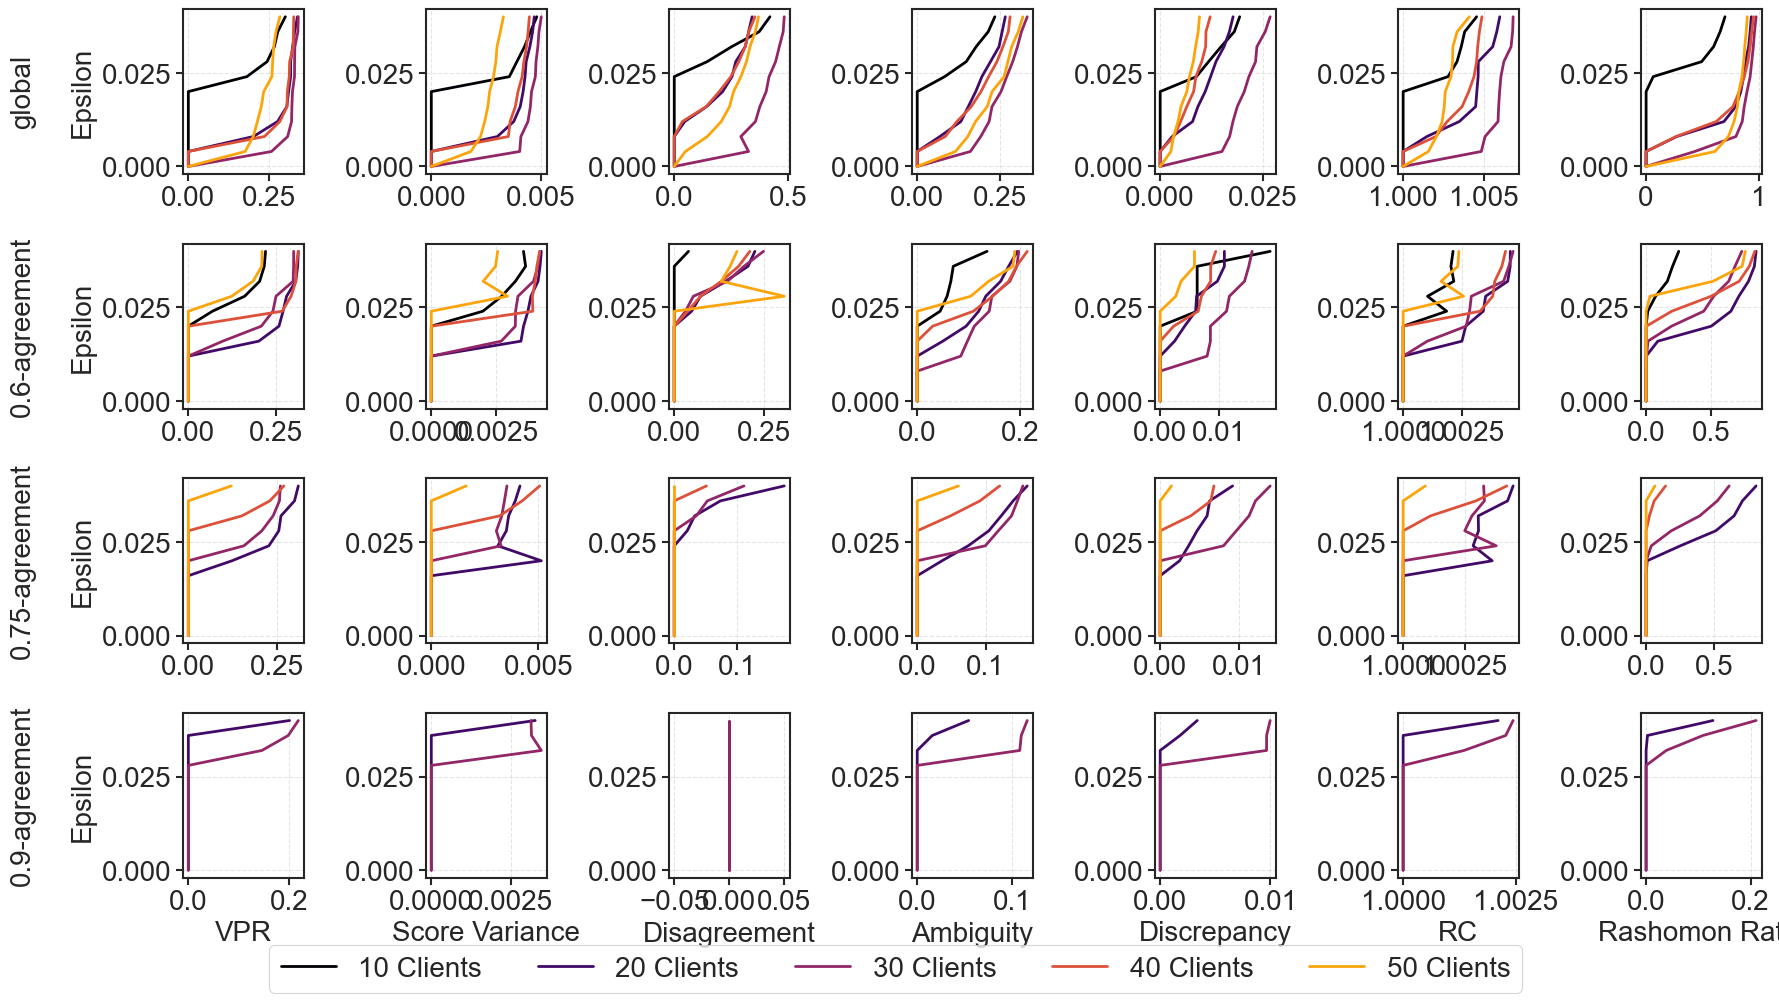

In [11]:
ensemble_size = [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036, 0.04]
import matplotlib.cm as cm

colors = cm.inferno(np.linspace(0, 1, len(dataset_names) + 1))
keys = ["global", "0.6_global", "0.75_global", "0.9_global"]
key_name = ["global", "0.6-agreement", "0.75-agreement", "0.9-agreement"]

fig, ax = plt.subplots(len(keys), 7, figsize=(18, 10))  #gridspec_kw={'height_ratios': [3.5,1]})
for n in range(len(dataset_names)):
    name = dataset_names[n]
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]

    #print(l)


    for k in range(len(keys)):
        key = keys[k]

        if (name in ["Dutch_50", "Dutch_10", "Dutch_40" ] and "0.9" in key) or (name in [ "Dutch_10" ] and "0.75" in key):
                continue
        elif name =="Dutch_50":
            vpr = runs_df[key]["vpr_50"]
            score_var = runs_df[key]["score_var_90"]
            disa_hat = runs_df[key]["disa_hat_90"]
            amb = runs_df[key]["amb"]
            disc = runs_df[key]["disc"]
            rashomon_ratio = np.cumsum(runs_df[key]["rashomonratio"]) / all_models[name]

            #for i in range(1,len(ensemble_size)):

            if f"rc_{key}" in rc_runs_df.keys():
                rc = rc_runs_df[f"rc_{key}"]
                ax[k, 5].plot([2 ** r for r in rc], ensemble_size, color = colors[n])

        else:
            vpr = runs_df[key]["vpr_50"].array[0]
            score_var = runs_df[key]["score_var_90"].array[0]
            disa_hat = runs_df[key]["disa_hat_90"].array[0]
            amb = runs_df[key]["amb"].array[0]
            disc = runs_df[key]["disc"].array[0]
            rashomon_ratio = np.cumsum(runs_df[key]["rashomonratio"].array[0]) / all_models[name]

            #for i in range(1,len(ensemble_size)):

            if f"rc_{key}" in rc_runs_df.keys():
                rc = rc_runs_df[f"rc_{key}"]["rc_50"].array[0]
                ax[k, 5].plot([2 ** r for r in rc], ensemble_size, color = colors[n])
                #print(np.max(rc[i]))

        ax[k, 0].plot(vpr, ensemble_size, label=key, color=colors[n])

        ax[k, 1].plot(score_var, ensemble_size, color=colors[n])
        ax[k, 2].plot(disa_hat, ensemble_size, color=colors[n])
        ax[k, 3].plot(amb, ensemble_size, color=colors[n])
        ax[k, 4].plot(disc, ensemble_size, color=colors[n])
        ax[k, 6].plot(rashomon_ratio, ensemble_size, color=colors[n])

        ax[k, 0].set_ylabel(f'{key_name[k]}\n\nEpsilon')
        #ax[n, 0].set_yticks(ensemble_size);

        #ax[0, 0].set_xticks(ensemble_size);
        if k == len(keys) - 1:
            ax[k, 0].set_xlabel('VPR')
            ax[k, 1].set_xlabel('Score Variance')
            ax[k, 2].set_xlabel('Disagreement')
            ax[k, 5].set_xlabel('RC')
            ax[k, 3].set_xlabel('Ambiguity')
            ax[k, 4].set_xlabel('Discrepancy')
            ax[k, 6].set_xlabel('Rashomon Ratio')

        #ax[0, 0].set_xscale('log')

fig.legend(labels=["10 Clients", "20 Clients", "30 Clients", "40 Clients", "50 Clients"], loc='lower center', ncol=10, bbox_to_anchor=(0.5, -0.03))
plt.tight_layout()

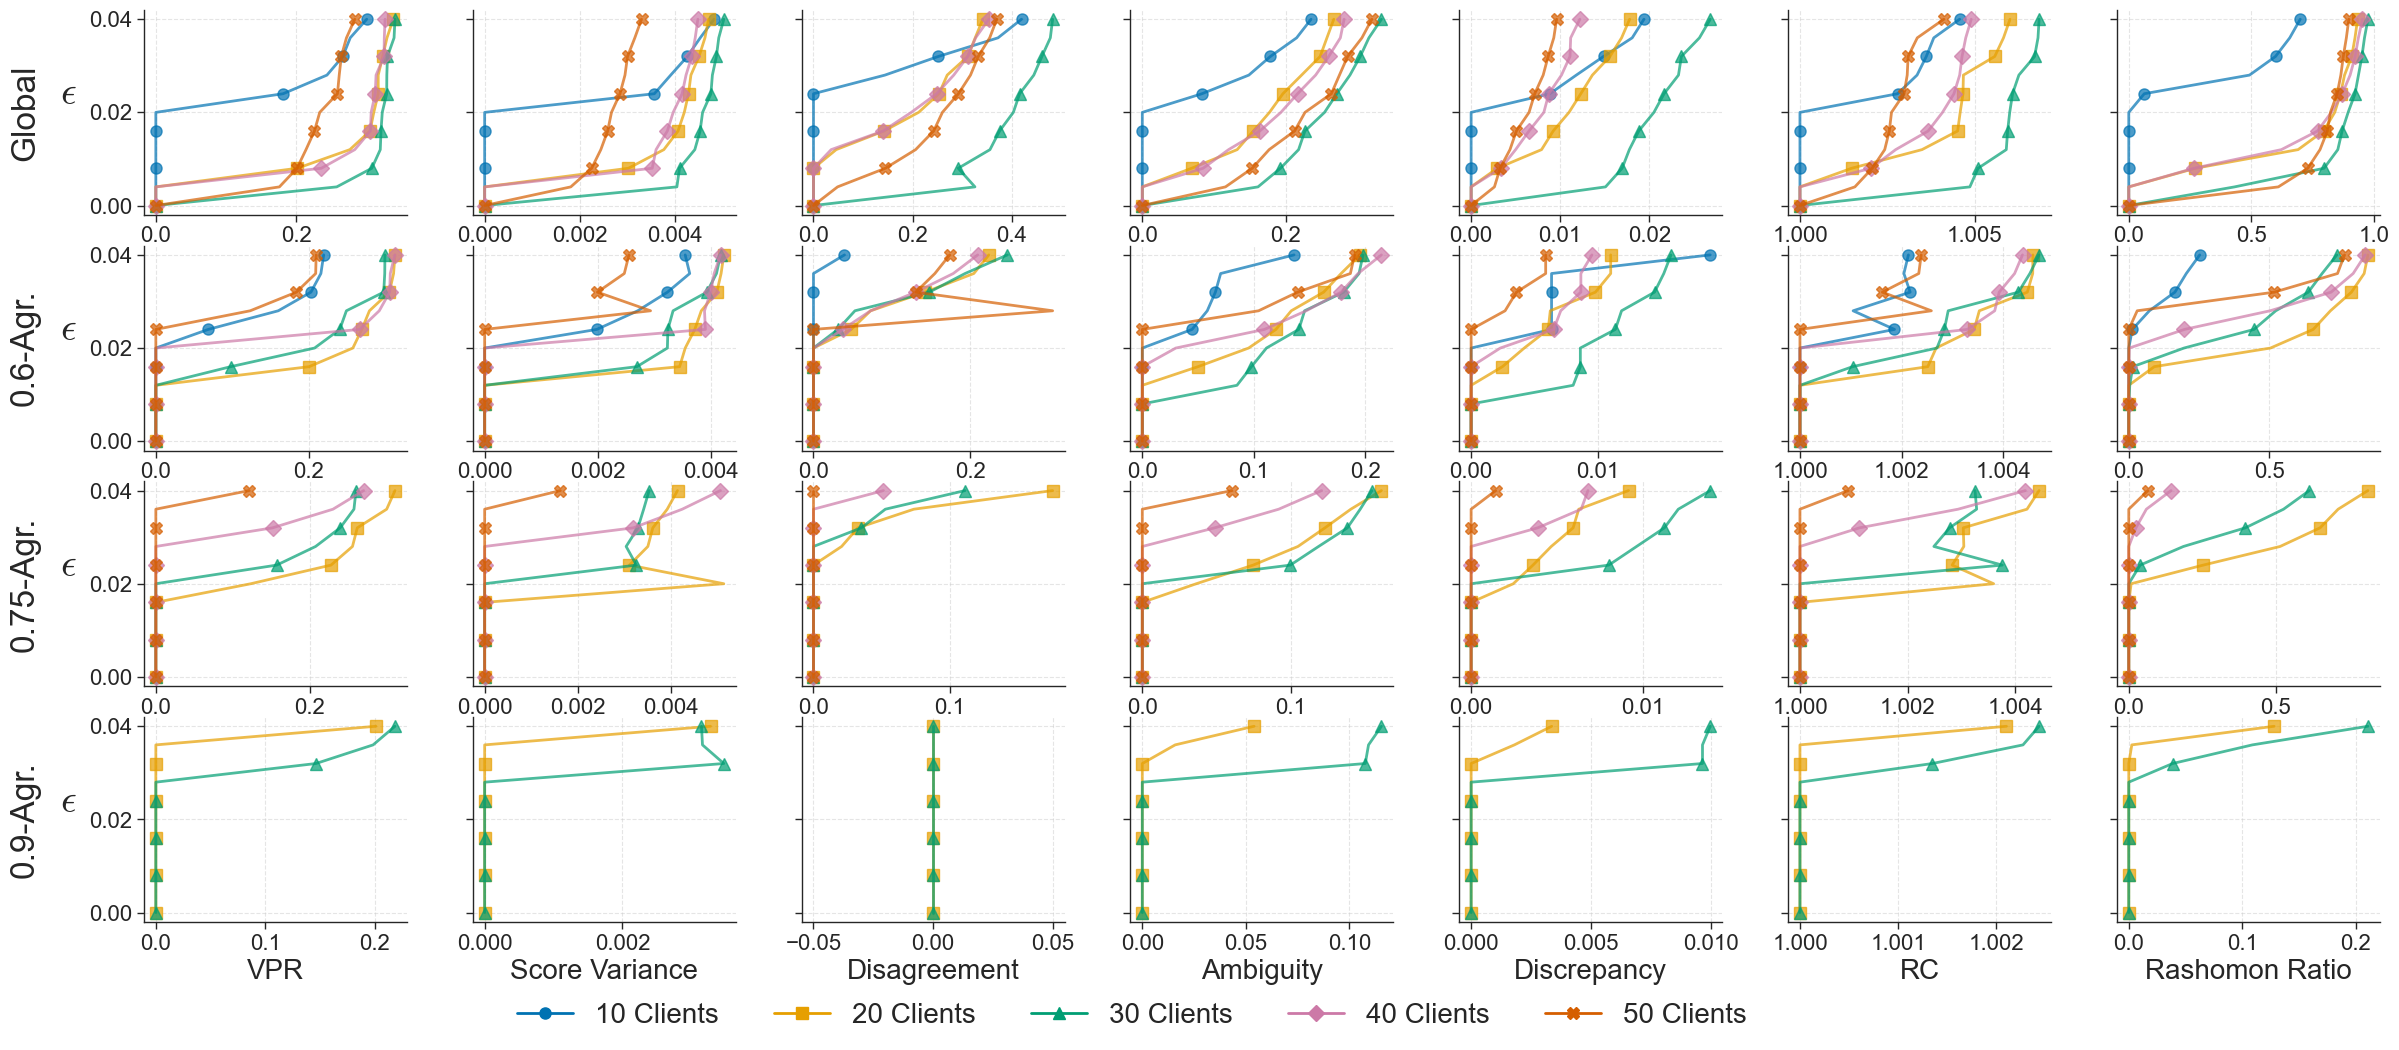

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- 1. CONFIGURATION ---
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")

params = {
    'text.usetex': False,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 20,
    'xtick.labelsize': 16,
    'ytick.labelsize': 16,
    'legend.fontsize': 18,
    'lines.linewidth': 2,
    'lines.markersize': 8,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'axes.labelweight': 'normal',
    'font.weight': 'normal',
    'axes.titleweight': 'normal',
}
plt.rcParams.update(params)

# --- 2. PALETTE & MAPS ---
colors = [
    "#0072B2", # Blue
    "#E69F00", # Orange
    "#009E73", # Bluish Green
    "#CC79A7", # Reddish Purple
    "#D55E00"  # Vermilion
]
markers = ['o', 's', '^', 'D', 'X']

keys = ["global", "0.6_global", "0.75_global", "0.9_global"]
key_name = ["Global", "0.6-Agr.", "0.75-Agr.", "0.9-Agr."]

# --- 3. ROBUST DATA EXTRACTOR ---
def get_data_array(source, key, length_check=11):
    """
    Robustly extracts an array, handling attributes, nested lists, and missing keys.
    """
    try:
        # Check if key exists (if source is dict/df) to avoid KeyError in logs
        if isinstance(source, (dict, type(runs_df))) and key not in source:
             # Fail silently here to allow the caller to handle (or return zeros)
             raise KeyError(f"Key '{key}' not found in source")

        raw = source[key]
        
        if hasattr(raw, 'array'):
            raw = raw.array[0]
            
        arr = np.array(raw)
        
        # Case A: Flat and correct length
        if arr.ndim == 1 and len(arr) >= length_check:
            return arr[:length_check]
            
        # Case B: Nested (1, N)
        if arr.ndim == 2 and arr.shape[0] == 1:
            return arr[0][:length_check]
            
        # Case C: Object array wrapping list
        if arr.size == 1 and isinstance(arr.item(), (list, np.ndarray)):
            return np.array(arr.item())[:length_check]

        return arr
        
    except Exception:
        # Return zeros so plot doesn't crash, but warn effectively
        return np.zeros(length_check)

# --- 4. PLOTTING ---
fig, ax = plt.subplots(len(keys), 7, figsize=(26, 12), sharey=True)

legend_handles = []
legend_labels = ["10 Clients", "20 Clients", "30 Clients", "40 Clients", "50 Clients"]
# line_alpha = 0.7

for n in range(len(dataset_names)):
    name = dataset_names[n]
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]
    
    c = colors[n % len(colors)]
    m = markers[n % len(markers)]

    for k in range(len(keys)):
        key = keys[k]

        # --- A. ROW LABELS ---
        if n == 0:
            ax[k, 0].set_yticks([0.00, 0.02, 0.04])
            ax[k, 0].set_ylabel(r'$\epsilon$', fontsize=28, rotation=0, labelpad=15)
            ax[k, 0].text(-0.45, 0.5, key_name[k], 
                          transform=ax[k, 0].transAxes, 
                          rotation=90, 
                          ha='center', va='center', 
                          fontsize=24, fontweight='normal')

        # --- B. DATA EXTRACTION ---
        if (name in ["Dutch_50", "Dutch_10", "Dutch_40" ] and "0.9" in key) or \
           (name in [ "Dutch_10" ] and "0.75" in key):
            continue
        
        # --- FIXED EXTRACTION LOGIC ---
        # 1. Check if the hierarchical key (e.g., 'global') exists first.
        #    If yes, we drill down. If no, we assume flat keys (e.g., 'global/vpr_50').
        
        if key in runs_df:
            # Hierarchical Structure (Dict of Dicts)
            sub_source = runs_df[key]
            vpr = get_data_array(sub_source, "vpr_50")
            score_var = get_data_array(sub_source, "score_var_90")
            disa_hat = get_data_array(sub_source, "disa_hat_90")
            amb = get_data_array(sub_source, "amb")
            disc = get_data_array(sub_source, "disc")
            
            raw_rashomon = get_data_array(sub_source, "rashomonratio")
            # Fallback for spelling variations
            if np.all(raw_rashomon == 0): 
                raw_rashomon = get_data_array(sub_source, "rashomon_ratio")
        else:
            # Flat Structure (e.g., WandB flattened history)
            # We construct the keys manually: "global/vpr_50"
            vpr = get_data_array(runs_df, f"{key}/vpr_50")
            score_var = get_data_array(runs_df, f"{key}/score_var_90")
            disa_hat = get_data_array(runs_df, f"{key}/disa_hat_90")
            amb = get_data_array(runs_df, f"{key}/amb")
            disc = get_data_array(runs_df, f"{key}/disc")
            
            raw_rashomon = get_data_array(runs_df, f"{key}/rashomonratio")
            if np.all(raw_rashomon == 0):
                raw_rashomon = get_data_array(runs_df, f"{key}/rashomon_ratio")

        # Calculate Cumulative Rashomon Ratio
        rashomon_ratio = np.cumsum(raw_rashomon) / all_models[name]

        # RC Extraction
        rc = None
        rc_key_name = f"rc_{key}"
        if rc_key_name in rc_runs_df.keys():
            raw_rc_container = rc_runs_df[rc_key_name]
            if isinstance(raw_rc_container, (list, np.ndarray)):
                rc = get_data_array({ "k": raw_rc_container }, "k")
            else:
                rc = get_data_array(raw_rc_container, "rc_50")

        # --- C. PLOTTING ---
        l, = ax[k, 0].plot(vpr, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        ax[k, 1].plot(score_var, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        ax[k, 2].plot(disa_hat, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        ax[k, 3].plot(amb, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        ax[k, 4].plot(disc, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        
        if rc is not None:
             ax[k, 5].plot([2 ** r for r in rc], ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)

        ax[k, 6].plot(rashomon_ratio, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)

        if k == 0:
            legend_handles.append(l)

# --- D. CLEANUP ---
col_titles = ['VPR', 'Score Variance', 'Disagreement', 'Ambiguity', 'Discrepancy', 'RC', 'Rashomon Ratio']

for k in range(len(keys)):
    for col in range(7):
        ax[k, col].spines['top'].set_visible(False)
        ax[k, col].spines['right'].set_visible(False)
        
        if k == len(keys) - 1:
            ax[k, col].set_xlabel(col_titles[col], fontweight='normal')
        # else:
        #     ax[k, col].set_xticklabels([])

# --- E. LAYOUT & LEGEND ---
plt.subplots_adjust(left=0.12, right=0.98, bottom=0.12, wspace=0.25, hspace=0.15)

leg = fig.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    ncol=5, 
    bbox_to_anchor=(0.5, 0.01),
    frameon=False,
    fontsize=20
)

for line in leg.get_lines():
    line.set_alpha(1.0)

plt.savefig("client_numbers.pdf", dpi=500, bbox_inches='tight')
plt.show()

### Differential Privacy evaluation


In [13]:

api_list = [] #your list here
dataset_names = ["Dutch", "ACS Income", "MNIST"]

all_runs = {}
all_rc_runs = {}
for a in range(len(api_list)):
    # Project is specified by <entity/project-name>
    runs = api.runs(api_list[a])

    runs_df = {}
    rc_runs_df = {}

    for run in runs:
        #print(run.created_at)
        if run.created_at >= "2025-11-28T09:54:16.669007Z":

            # .name is the human-readable name of the run.

            if "rc_" in run.name:

                if dataset_names[a] == "ACS Income" and not "0.9" in run.name:
                    #run.file("wandb-summary.json").download(replace=True, root =f"income_results/{run.name}" )
                    summary = json.load(open(f"income_results/{run.name}/wandb-summary.json"))
                    rc_runs_df[run.name] = summary["rc_50_difpriv"]
                    print(f"Loaded {dataset_names[a], run.name} successfully")
                elif dataset_names[a] != "ACS Income":
                    df = run.history(keys=["rc_50_difpriv"])
                    rc_runs_df[run.name] = df
                    print(f"Loaded {dataset_names[a], run.name} successfully")

            else:

                if dataset_names[a] == "ACS Income" and not "0.9" in run.name:
                    #history = run.scan_history()
                    #print(run.summary())
                    df = {}
                    #run.file("wandb-summary.json").download(replace=True, root =f"income_results/{run.name}" )
                    summary = json.load(open(f"income_results/{run.name}/wandb-summary.json"))
                    #df["rashomonratio"] = summary["rashomonratio"]
                    df["vpr_50"] = summary["vpr_50_difpriv"]
                    df["score_var_90"] = summary["score_var_90_difpriv"]
                    df["disa_hat_90"] = summary["disa_hat_90_difpriv"]
                    #df["amb"] = summary["amb_difpriv"]
                    #df["disc"] = summary["disc_difpriv"]
                    runs_df[run.name] = df

                    print(f"Loaded {dataset_names[a], run.name} successfully")

                elif dataset_names[a] != "ACS Income":
                    df = run.history(keys=[ "disa_hat_90_difpriv", "score_var_90_difpriv", "vpr_50_difpriv"])
                    #df["rashomonratio"] = run.history(keys=["rashomonratio"])["rashomonratio"]
                    runs_df[run.name] = df
                    print(f"Loaded {dataset_names[a], run.name} successfully")
            # .summary contains the output keys/values for metrics like accuracy.
            #  We call ._json_dict to omit large files

        all_runs[dataset_names[a]] = runs_df
        all_rc_runs[dataset_names[a]] = rc_runs_df



Loaded ('Dutch', '0.6_global') successfully
Loaded ('Dutch', 'rc_0.6_global') successfully
Loaded ('Dutch', '0.75_global') successfully
Loaded ('Dutch', 'rc_0.75_global') successfully
Loaded ('Dutch', '0.9_global') successfully
Loaded ('Dutch', 'rc_0.9_global') successfully
Loaded ('Dutch', 'global') successfully
Loaded ('Dutch', 'rc_global') successfully
Loaded ('Dutch', 'individual_0') successfully
Loaded ('Dutch', 'rc_0_individual') successfully
Loaded ('Dutch', 'individual_1') successfully
Loaded ('Dutch', 'rc_1_individual') successfully
Loaded ('Dutch', 'individual_2') successfully
Loaded ('Dutch', 'rc_2_individual') successfully
Loaded ('Dutch', 'individual_3') successfully
Loaded ('Dutch', 'rc_3_individual') successfully
Loaded ('Dutch', 'individual_4') successfully
Loaded ('Dutch', 'rc_4_individual') successfully
Loaded ('Dutch', 'individual_5') successfully
Loaded ('Dutch', 'rc_5_individual') successfully
Loaded ('Dutch', 'individual_6') successfully
Loaded ('Dutch', 'rc_6_ind

[0, 0, 0.436, 0.444, 0.441, 0.456, 0.449, 0.448, 0.448, 0.443, 0.448]
[0, 0, 0, 0, 0.439, 0.438, 0.45, 0.445, 0.444, 0.449, 0.443]
[0, 0, 0, 0, 0, 0.443, 0.426, 0.431, 0.438, 0.439, 0.451]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0.437, 0.448]
[0, 0.504, 0.486, 0.504, 0.493, 0.487, 0.505, 0.503, 0.494, 0.494, 0.506]
[0, 0, 0.501, 0.497, 0.497, 0.491, 0.502, 0.496, 0.5, 0.498, 0.498]
[0, 0, 0.494, 0.493, 0.498, 0.507, 0.495, 0.502, 0.494, 0.492, 0.499]
[0, 0, 0, 0.497, 0.507, 0.501, 0.507, 0.507, 0.503, 0.504, 0.511]


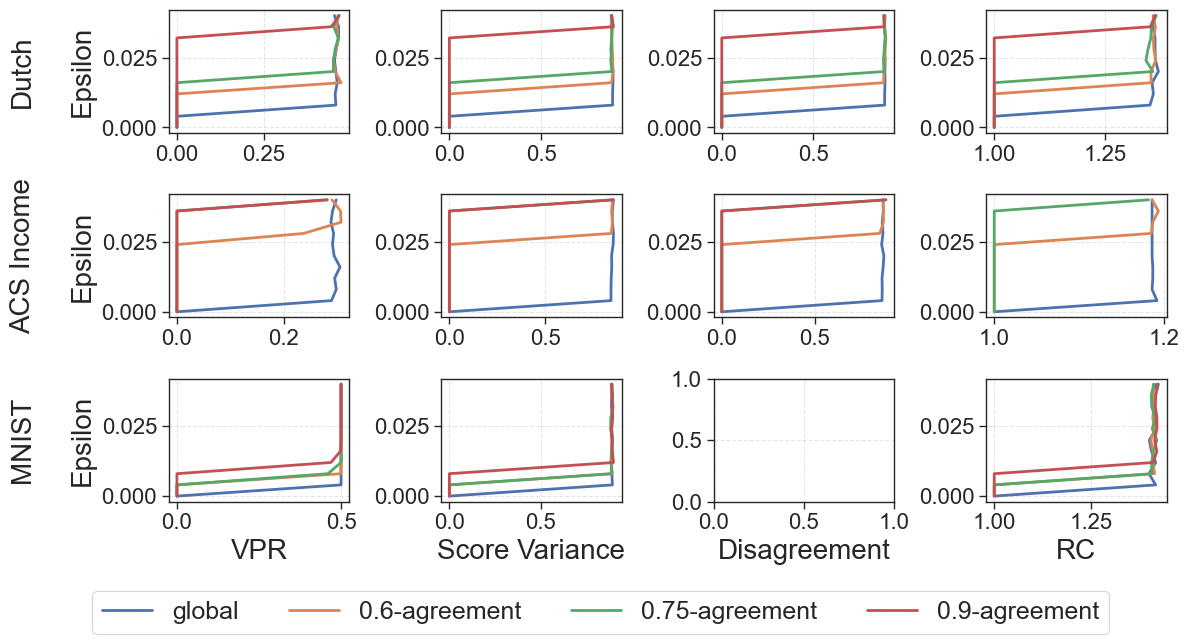

In [14]:
ensemble_size = [0.0, 0.004, 0.008, 0.012, 0.016, 0.02, 0.024, 0.028, 0.032, 0.036, 0.04]

all_models = {"Dutch": 375, "ACS Income": 392, "MNIST": 400}
fig, ax = plt.subplots(len(dataset_names), 4, figsize=(12, 6))  #gridspec_kw={'height_ratios': [3.5,1]})

for n in range(len(dataset_names)):
    name = dataset_names[n]
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]

    colors = ['darkgoldenrod', 'darkorange', 'tomato', 'navy', 'royalblue', 'lightsteelblue']
    keys = ["global", "0.6_global", "0.75_global", "0.9_global"]

    for k in range(len(keys)):
        key = keys[k]
        if name == "ACS Income" and not "0.9" in key:
            vpr = runs_df[key]["vpr_50"][:11]
            score_var = runs_df[key]["score_var_90"][:11]
            disa_hat = runs_df[key]["disa_hat_90"][:11]
            #amb = runs_df[key]["amb"][:11]
            #disc = runs_df[key]["disc"][:11]
            if f"rc_{key}" in rc_runs_df.keys():
                rc = rc_runs_df[f"rc_{key}"][:11]
                ax[n, 3].plot([2 ** e for e in rc], ensemble_size)

            #rashomon_ratio = np.cumsum(runs_df[key]["rashomonratio"]) / all_models[name]
        elif name != "ACS Income":
            vpr = runs_df[key]["vpr_50_difpriv"].array[0][:11]
            score_var = runs_df[key]["score_var_90_difpriv"].array[0][:11]
            #amb = runs_df[key]["amb"].array[0][:11]  #
            #disc = runs_df[key]["disc"].array[0][:11]
            disa_hat = runs_df[key]["disa_hat_90_difpriv"].array[0][:11]

            if f"rc_{key}" in rc_runs_df.keys():
                print(rc_runs_df[f"rc_{key}"]["rc_50_difpriv"].array[0])
                rc = rc_runs_df[f"rc_{key}"]["rc_50_difpriv"].array[0][:11]
                ax[n, 3].plot([2 ** e for e in rc], ensemble_size)

            #rashomon_ratio = np.cumsum(runs_df[key]["rashomonratio"].array[0]) / all_models[name]

        '''
            np.array([entry["vpr_50"].array[0] for key, entry in runs_df.items() if key in ["global", "0.6_global", "0.75_global", "0.9_global"]]))

        score_var = np.array([entry["score_var_90"].array[0] for key, entry in runs_df.items() if key in ["global", "0.6_global", "0.75_global", "0.9_global"]])
        disa_hat = np.array([entry["disa_hat_90"].array[0] for key, entry in runs_df.items() if key in ["global", "0.6_global", "0.75_global", "0.9_global"]])
        amb =np.array( [entry["amb"].array[0] for key, entry in runs_df.items() if key in ["global", "0.6_global", "0.75_global", "0.9_global"]])
        disc = np.array([entry["disc"].array[0] for key, entry in runs_df.items() if key in ["global", "0.6_global", "0.75_global", "0.9_global"]])
        rashomon_ratio = np.array([entry["rashomonratio"].array[0] for key, entry in runs_df.items() if key in ["global", "0.6_global", "0.75_global", "0.9_global"]])
        rc = np.array([entry["rc_50"].array[0] for key, entry in rc_runs_df.items() if key in  ["global", "0.6_global", "0.75_global", "0.9_global"]])

        '''

        ax[n, 0].plot(vpr, ensemble_size, label=key)

        ax[n, 0].set_ylabel(f'{name}\n\nEpsilon')
        #ax[n, 0].set_yticks(ensemble_size);
        ax[n, 1].plot(score_var, ensemble_size)

        #ax[0, 0].plot(ensemble_size, 2**rc.T, label='RC', color=colors[2])
        if name != "MNIST":
            ax[n, 2].plot(disa_hat, ensemble_size)

        #ax[n, 3].plot(amb, ensemble_size)

        #ax[n, 4].plot(disc, ensemble_size)

        #ax[n, 6].plot(rashomon_ratio, ensemble_size)
        #ax[0, 0].set_xticks(ensemble_size);
        if n == len(dataset_names) - 1:
            ax[n, 0].set_xlabel('VPR')
            ax[n, 1].set_xlabel('Score Variance')
            ax[n, 2].set_xlabel('Disagreement')
            #ax[n, 3].set_xlabel('Ambiguity')
            #ax[n, 3].set_xlabel('Discrepancy')
            ax[n, 3].set_xlabel('RC')
            #ax[n, 5].set_xlabel('Rashomon Ratio')
        #ax[0, 0].set_xticks(ensemble_size);

        #ax[0, 0].set_xscale('log')
        #print(rashomon_ratio)

fig.legend(labels=["global", "0.6-agreement", "0.75-agreement", "0.9-agreement"], loc='lower center',
           ncol=5, bbox_to_anchor=(0.5, -0.1));
plt.tight_layout()





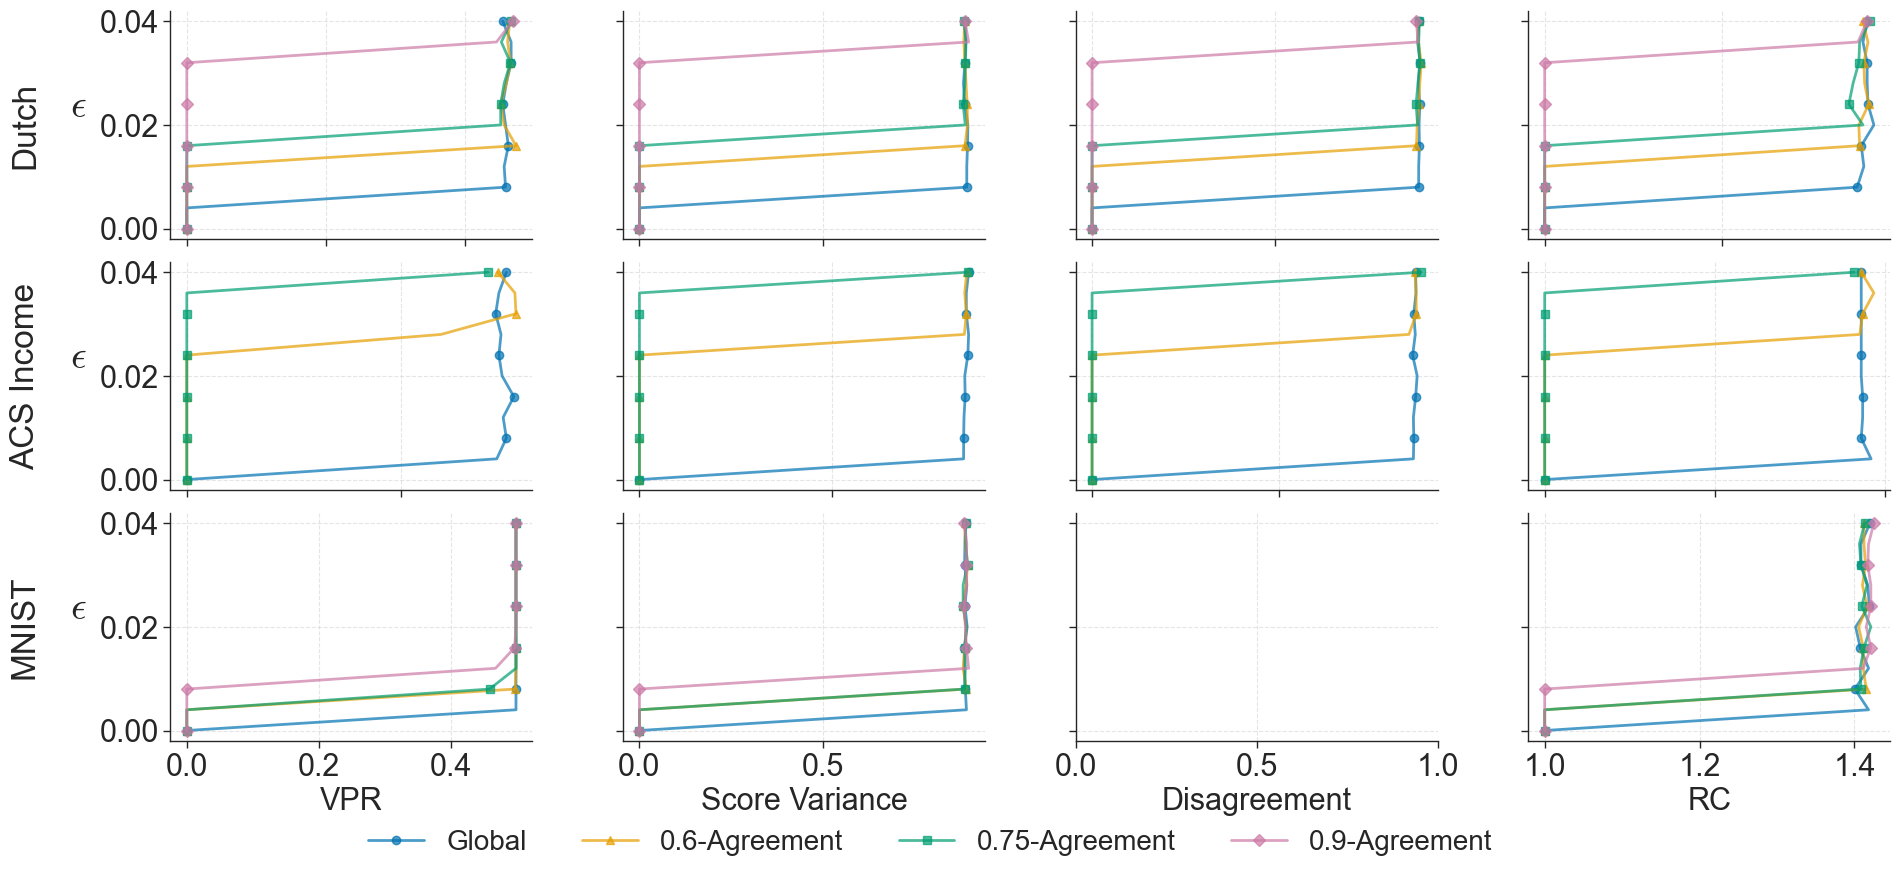

In [15]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- 1. CONFIGURATION ---
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")

params = {
    'text.usetex': False,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 22,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'axes.labelweight': 'normal',
    'font.weight': 'normal',
    'axes.titleweight': 'normal',
}
plt.rcParams.update(params)

# --- 2. MAPS ---
# Okabe-Ito Color Palette

color_map = {
    "global": "#0072B2",      # Blue
    "0.6_global": "#E69F00",  # Orange 
    "0.75_global": "#009E73", # Bluish Green
    "0.9_global": "#CC79A7",  # Reddish Purple
}

label_map = {
    "global": "Global",
    "0.6_global": "0.6-Agreement",
    "0.75_global": "0.75-Agreement",
    "0.9_global": "0.9-Agreement",
}

marker_map = {
    "global": "o",
    "0.6_global": "^",
    "0.75_global": "s",
    "0.9_global": "D",
}

# --- 3. ROBUST DATA EXTRACTOR ---
def get_data_array(source, key, length_check=11):
    try:
        # Check existence first
        if isinstance(source, dict) and key not in source:
             # Try failover for flattened structures if needed, otherwise raise
             raise KeyError(f"Key '{key}' not found")

        raw = source[key]
        
        if hasattr(raw, 'array'):
            raw = raw.array[0]
            
        arr = np.array(raw)
        
        # Case A: Flat
        if arr.ndim == 1 and len(arr) >= length_check:
            return arr[:length_check]
        # Case B: Nested
        if arr.ndim == 2 and arr.shape[0] == 1:
            return arr[0][:length_check]
        # Case C: Object wrapper
        if arr.size == 1 and isinstance(arr.item(), (list, np.ndarray)):
            return np.array(arr.item())[:length_check]

        return arr
    except Exception:
        return np.zeros(length_check)

# --- 4. PLOTTING ---
# 4 Columns as per your request
fig, ax = plt.subplots(len(dataset_names), 4, figsize=(20, 10), sharey=True)

legend_handles = []
legend_labels = []

keys = ["global", "0.6_global", "0.75_global", "0.9_global"]
line_alpha = 0.7

for n, name in enumerate(dataset_names):
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]

    # --- A. Y-AXIS & DATASET LABEL ---
    ax[n, 0].set_yticks([0.00, 0.02, 0.04])
    ax[n, 0].set_ylabel(r'$\epsilon$', fontsize=28, rotation=0, labelpad=15)
    
    # Dataset Name on Left
    ax[n, 0].text(-0.40, 0.5, name, 
                  transform=ax[n, 0].transAxes, 
                  rotation=90, 
                  ha='center', va='center', 
                  fontsize=24, fontweight='normal')

    for key in keys:
        # --- B. CONDITIONAL LOGIC (ADAPTED) ---
        if name == "ACS Income" and "0.9" in key:
            continue

        c = color_map.get(key, 'black')
        m = marker_map.get(key, 'o')
        
        # Initialize placeholders
        vpr, score_var, disa_hat, rc = [None]*4

        # Logic: ACS Income uses standard keys, others use _difpriv suffix
        if name == "ACS Income":
            client_data = runs_df[key]
            vpr = get_data_array(client_data, "vpr_50")
            score_var = get_data_array(client_data, "score_var_90")
            disa_hat = get_data_array(client_data, "disa_hat_90")
            
            # RC for ACS
            rc_key = f"rc_{key}"
            if rc_key in rc_runs_df:
                rc = get_data_array(rc_runs_df, rc_key)
                
        else:
            # Logic for Dutch/MNIST (using _difpriv suffix)
            client_data = runs_df[key]
            vpr = get_data_array(client_data, "vpr_50_difpriv")
            score_var = get_data_array(client_data, "score_var_90_difpriv")
            disa_hat = get_data_array(client_data, "disa_hat_90_difpriv")
            
            # RC for Others
            rc_key = f"rc_{key}"
            if rc_key in rc_runs_df:
                # Based on your snippet: rc_runs_df[key]["rc_50_difpriv"]
                rc_container = rc_runs_df[rc_key]
                rc = get_data_array(rc_container, "rc_50_difpriv")

        # --- C. PLOT LINES ---
        # Col 0: VPR
        l, = ax[n, 0].plot(vpr, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha, label=label_map[key])
        
        # Col 1: Score Variance
        ax[n, 1].plot(score_var, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        
        # Col 2: Disagreement (Skip for MNIST)
        if name != "MNIST":
            ax[n, 2].plot(disa_hat, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
            
        # Col 3: RC
        if rc is not None:
             ax[n, 3].plot([2**e for e in rc], ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)

        # Legend Collection
        if n == 0 and key in label_map and label_map[key] not in legend_labels:
            legend_handles.append(l)
            legend_labels.append(label_map[key])

    # --- D. CLEANUP ---
    titles = ['VPR', 'Score Variance', 'Disagreement', 'RC']
    
    for col in range(4):
        ax[n, col].spines['top'].set_visible(False)
        ax[n, col].spines['right'].set_visible(False)
        
        if n == len(dataset_names) - 1:
            ax[n, col].set_xlabel(titles[col], fontweight='normal')
        else:
            ax[n, col].set_xticklabels([])

# --- E. LAYOUT & LEGEND ---
plt.subplots_adjust(left=0.12, right=0.98, bottom=0.15, wspace=0.25, hspace=0.1)

fig.legend(
    handles=legend_handles,
    labels=legend_labels,
    loc='lower center',
    ncol=4,
    bbox_to_anchor=(0.5, 0.01),
    frameon=False,
    fontsize=20
)

plt.savefig("difpriv_results.pdf", dpi=500, bbox_inches='tight')
plt.show()

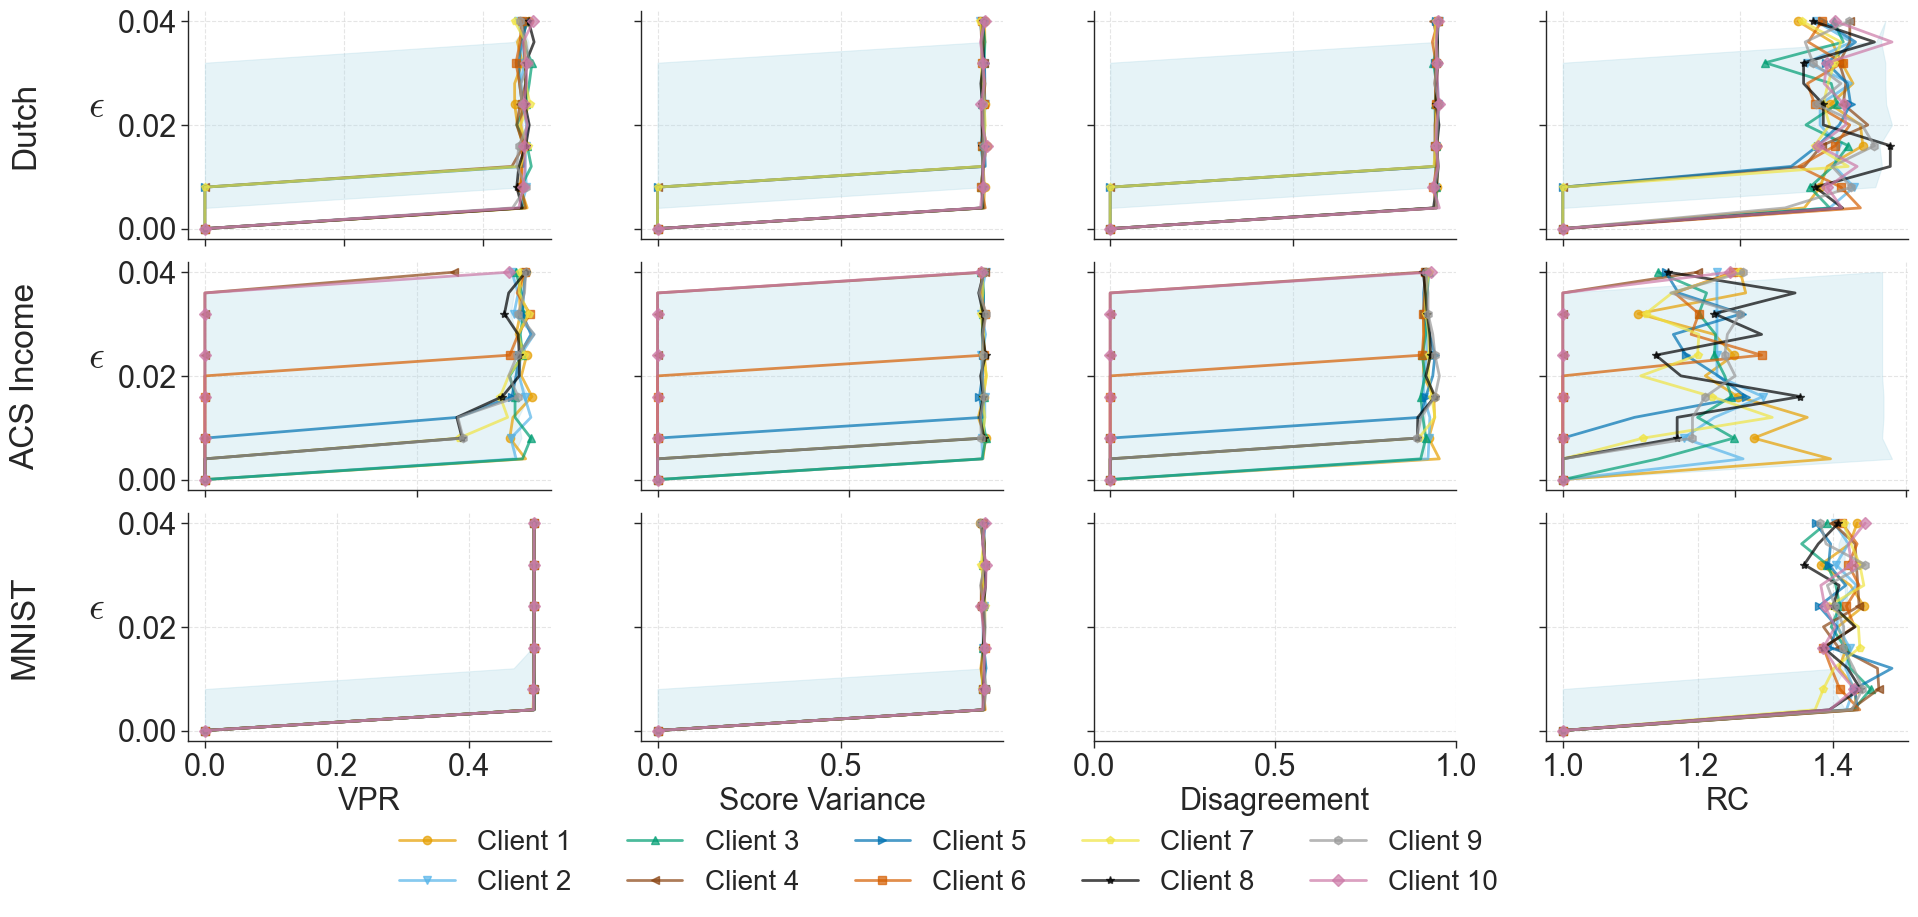

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# --- 1. CONFIGURATION ---
sns.set_context("paper", font_scale=1.5)
sns.set_style("ticks")

params = {
    'text.usetex': False,
    'mathtext.fontset': 'cm',
    'axes.labelsize': 22,
    'xtick.labelsize': 22,
    'ytick.labelsize': 22,
    'legend.fontsize': 22,
    'lines.linewidth': 2,
    'lines.markersize': 6,
    'axes.grid': True,
    'grid.alpha': 0.5,
    'grid.linestyle': '--',
    'axes.labelweight': 'normal',
    'font.weight': 'normal',
    'axes.titleweight': 'normal',
}
plt.rcParams.update(params)

# --- 2. PALETTE (10 Colors) ---
colors = [
    "#E69F00", # Orange
    "#56B4E9", # Sky Blue
    "#009E73", # Bluish Green
    "#8B4513", # Saddle Brown
    "#0072B2", # Blue
    "#D55E00", # Vermilion
    "#F0E442", # Yellow
    "#000000", # Black
    "#999999", # Grey 
    "#CC79A7", # Reddish Purple
]

markers = ['o', 'v', '^', '<', '>', 's', 'p', '*', 'h', 'D']

keys = ["individual_0", "individual_1", "individual_2", "individual_3", "individual_4", 
        "individual_5", "individual_6", "individual_7", "individual_8", "individual_9"]
labels = ["Client 1", "Client 2", "Client 3", "Client 4", "Client 5", 
          "Client 6", "Client 7", "Client 8", "Client 9", "Client 10"]

color_map = {k: colors[i] for i, k in enumerate(keys)}
marker_map = {k: markers[i] for i, k in enumerate(keys)}

# --- 3. ROBUST DATA EXTRACTOR ---
def get_data_array(source, key, length_check=11):
    try:
        # If source is a dict, ensure key exists
        if isinstance(source, dict) and key not in source:
             raise KeyError(f"Key '{key}' not found")

        raw = source[key]
        if hasattr(raw, 'array'):
            raw = raw.array[0]
            
        arr = np.array(raw)
        
        # Flatten and check length
        if arr.ndim == 1 and len(arr) >= length_check:
            return arr[:length_check]
        if arr.ndim == 2 and arr.shape[0] == 1:
            return arr[0][:length_check]
        if arr.size == 1 and isinstance(arr.item(), (list, np.ndarray)):
            return np.array(arr.item())[:length_check]

        return arr
    except Exception:
        return np.zeros(length_check)

# --- 4. PLOTTING ---
# 4 Columns: VPR, Score Var, Disagreement, RC
fig, ax = plt.subplots(len(dataset_names), 4, figsize=(20, 10), sharey=True)

legend_handles = []
legend_labels_list = []
line_alpha = 0.7 

for n, name in enumerate(dataset_names):
    runs_df = all_runs[name]
    rc_runs_df = all_rc_runs[name]

    # --- Determine Suffix for DiffPriv keys ---
    # ACS Income uses standard keys; others use _difpriv
    suffix = "" if name == "ACS Income" else "_difpriv"

    # --- A. Y-AXIS FORMATTING ---
    ax[n, 0].set_yticks([0.00, 0.02, 0.04])
    ax[n, 0].set_ylabel(r'$\epsilon$', fontsize=28, rotation=0, labelpad=15)
    
    # Dataset Label
    ax[n, 0].text(-0.45, 0.5, name,  
                  transform=ax[n, 0].transAxes, 
                  rotation=90, 
                  ha='center', va='center', 
                  fontsize=24, fontweight='normal')

    # --- B. CLIENT LOOP ---
    for k in range(len(keys)):
        key = keys[k]
        c = color_map[key]
        m = marker_map[key]
        
        client_data = runs_df[key]
        
        # Extract Data with suffix logic
        vpr = get_data_array(client_data, f"vpr_50{suffix}")
        score_var = get_data_array(client_data, f"score_var_90{suffix}")
        disa_hat = get_data_array(client_data, f"disa_hat_90{suffix}")
        
        # RC Extraction
        rc = None
        rc_key_name = f"rc_{key[-1]}_individual" # e.g. rc_0_individual
        
        if rc_key_name in rc_runs_df:
            if name == "ACS Income":
                # ACS: stored directly as list
                rc = get_data_array(rc_runs_df, rc_key_name)
            else:
                # Others: stored as dict -> rc_50_difpriv
                rc_container = rc_runs_df[rc_key_name]
                rc = get_data_array(rc_container, f"rc_50{suffix}")

        # Plot Lines
        l, = ax[n, 0].plot(vpr, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha, label=labels[k])
        ax[n, 1].plot(score_var, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        
        if name != "MNIST":
            ax[n, 2].plot(disa_hat, ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)
        
        if rc is not None:
             ax[n, 3].plot([2**e for e in rc], ensemble_size, color=c, marker=m, markevery=2, alpha=line_alpha)

        # Collect Legend (First row only)
        if n == 0:
            legend_handles.append(l)
            legend_labels_list.append(labels[k])

    # --- C. SHADOW (FILL BETWEEN) ---
    # Define baseline keys
    global_key = "global"
    comp_key = "0.75_global" if name == "ACS Income" else "0.9_global"
    
    # Global Baseline Data
    g_data = runs_df[global_key]
    vpr_g = get_data_array(g_data, f"vpr_50{suffix}")
    score_var_g = get_data_array(g_data, f"score_var_90{suffix}")
    disa_hat_g = get_data_array(g_data, f"disa_hat_90{suffix}")
    
    # Comparison Baseline Data
    c_data = runs_df[comp_key]
    vpr_c = get_data_array(c_data, f"vpr_50{suffix}")
    score_var_c = get_data_array(c_data, f"score_var_90{suffix}")
    disa_hat_c = get_data_array(c_data, f"disa_hat_90{suffix}")
    
    # RC Baselines
    rc_g_key = "rc_global"
    rc_c_key = f"rc_{comp_key}"
    
    # Helper for RC extraction
    def extract_rc_baseline(k_name):
        if k_name in rc_runs_df:
            raw = rc_runs_df[k_name]
            if name == "ACS Income":
                return get_data_array({"x": raw}, "x")
            else:
                return get_data_array(raw, f"rc_50{suffix}")
        return np.zeros(11)

    rc_g = extract_rc_baseline(rc_g_key)
    rc_c = extract_rc_baseline(rc_c_key)
    
    # Plot Fill (Light Blue)
    fill_color = "#ADD8E6"
    fill_alpha = 0.3
    
    ax[n, 0].fill_betweenx(ensemble_size, vpr_c, vpr_g, color=fill_color, alpha=fill_alpha)
    ax[n, 1].fill_betweenx(ensemble_size, score_var_c, score_var_g, color=fill_color, alpha=fill_alpha)
    if name != "MNIST":
        ax[n, 2].fill_betweenx(ensemble_size, disa_hat_c, disa_hat_g, color=fill_color, alpha=fill_alpha)
    ax[n, 3].fill_betweenx(ensemble_size, [2**e for e in rc_c], [2**e for e in rc_g], color=fill_color, alpha=fill_alpha)

    # --- D. CLEANUP ---
    titles = ['VPR', 'Score Variance', 'Disagreement', 'RC']
    for col in range(4):
        ax[n, col].spines['top'].set_visible(False)
        ax[n, col].spines['right'].set_visible(False)
        
        if n == len(dataset_names) - 1:
            ax[n, col].set_xlabel(titles[col], fontweight='normal')
        else:
            ax[n, col].set_xticklabels([])

# --- E. LAYOUT & LEGEND ---
plt.subplots_adjust(left=0.12, right=0.98, bottom=0.15, wspace=0.25, hspace=0.1)

fig.legend(
    handles=legend_handles,
    labels=legend_labels_list,
    loc='lower center',
    ncol=5,
    bbox_to_anchor=(0.5, -0.03),
    frameon=False,
    fontsize=20
)

plt.savefig("individuals_difpriv.pdf", dpi=500, bbox_inches='tight')
plt.show()